In [2]:
import pandas as pd
# import openpyxl
# from openpyxl import Workbook
import requests
import numpy as np

In [3]:
url=("https://raw.githubusercontent.com/RajakAly/Data_File/main/Power_plant.csv")
df=pd.read_csv(url)


In [4]:
df.head()


,AT,V,AP,RH,PE
0,8.34,40.77,1010.84,90.01,480.48
1,23.64,58.49,1011.40,74.20,445.75
2,29.74,56.90,1007.15,41.91,438.76
3,19.07,49.69,1007.22,76.79,453.09
4,11.80,40.66,1017.13,97.20,464.43


In [6]:
df.shape,df.dtypes

((9568, 5),
 AT    float64
 V     float64
 AP    float64
 RH    float64
 PE    float64
 dtype: object)

In [5]:
#Basics satistics for the given dataset
df.describe().T

,count,mean,std,min,25%,50%,75%,max
AT,9568.0,19.651231,7.452473,1.81,13.5100,20.345,25.72,37.11
V,9568.0,54.305804,12.707893,25.36,41.7400,52.080,66.54,81.56
AP,9568.0,1013.259078,5.938784,992.89,1009.1000,1012.940,1017.26,1033.30
RH,9568.0,73.308978,14.600269,25.56,63.3275,74.975,84.83,100.16
PE,9568.0,454.365009,17.066995,420.26,439.7500,451.550,468.43,495.76


In [6]:
#Renaming the Columns name
df.rename(columns={'AT':'Ambient_Temperature','V':'Exhaust_Vacuum','AP':'Ambient_Pressure','PE':'Power_Output','RH':'Relative_Humidity'},inplace=True)

In [7]:
df.head()

,Ambient_Temperature,Exhaust_Vacuum,Ambient_Pressure,Relative_Humidity,Power_Output
0,8.34,40.77,1010.84,90.01,480.48
1,23.64,58.49,1011.40,74.20,445.75
2,29.74,56.90,1007.15,41.91,438.76
3,19.07,49.69,1007.22,76.79,453.09
4,11.80,40.66,1017.13,97.20,464.43


In [8]:
df.isnull().sum()
#No Null vaules found

Ambient_Temperature    0
Exhaust_Vacuum         0
Ambient_Pressure       0
Relative_Humidity      0
Power_Output           0
dtype: int64

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy import stats


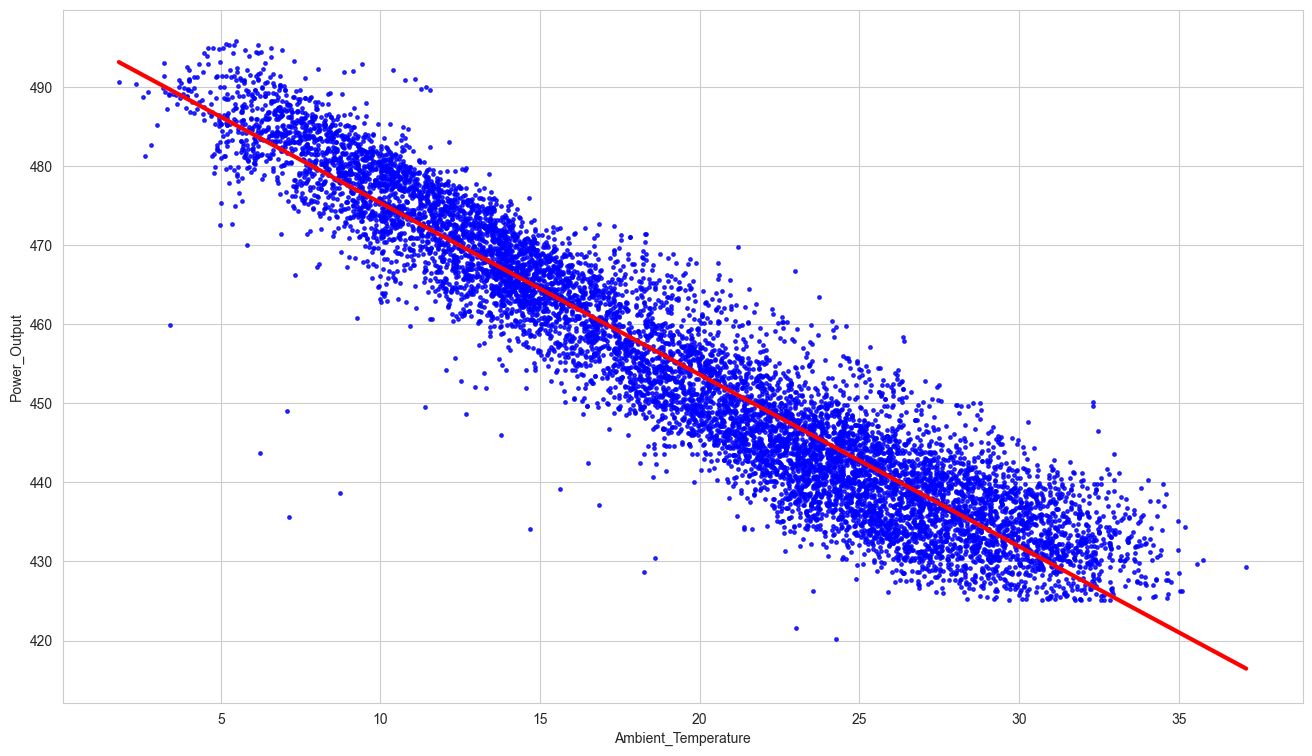

In [10]:
#Power output Vs Ambient Temperatue
plt.figure(figsize=(16,9))
sns.set_style('whitegrid')
ax=sns.regplot(x=df['Ambient_Temperature'],y=df['Power_Output'],scatter_kws={'color':'b','s':6},line_kws={'color':'r','linewidth':3})

In [11]:
stats.linregress(x=ax.get_lines()[0].get_xdata(),y=ax.get_lines()[0].get_ydata())

LinregressResult(slope=-2.1713199585177985, intercept=497.0341198927667, rvalue=-1.0, pvalue=0.0, stderr=0.0, intercept_stderr=0.0)

Mathematically the realtion can be written as -
PO=497-2.17X(AT)


That means 1℃ rise in ambient temperature the net power output decreases by 2.17.

# Exhaust vacuum Vs Power output

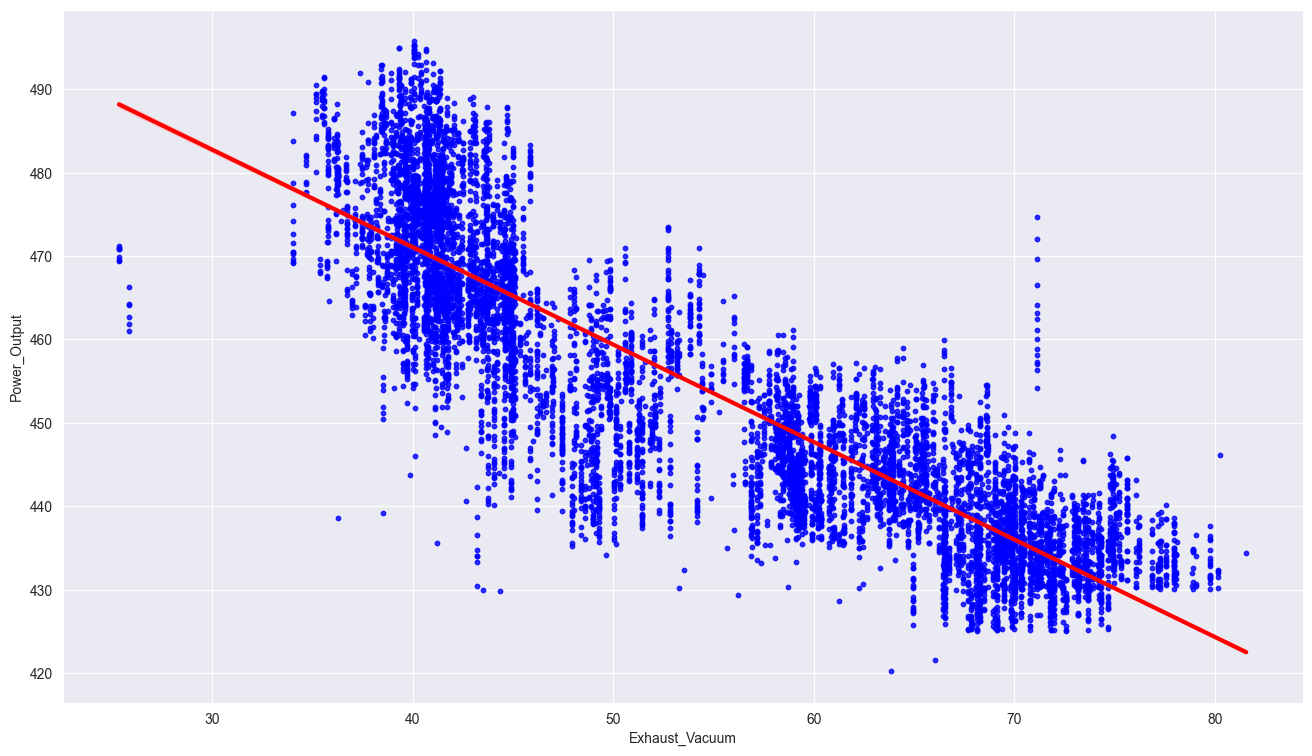

In [12]:
plt.figure(figsize=(16,9))
sns.set_style('darkgrid')
ax1=sns.regplot(x=df['Exhaust_Vacuum'],y=df['Power_Output'],scatter_kws={'color':'b','s':10},line_kws={'color':'r','linewidth':3})

In [13]:
stats.linregress(x=ax1.get_lines()[0].get_xdata(),y=ax1.get_lines()[0].get_ydata())

LinregressResult(slope=-1.1681351265557145, intercept=517.801526308386, rvalue=-1.0, pvalue=0.0, stderr=0.0, intercept_stderr=0.0)

**PO=517.8-1.168*(Exhaust Vacuum)**


1 cm Hg rise in exhaust vacuum decreases power output by 1.168 MW per hour.


# Relative Humidity Vs Power Output

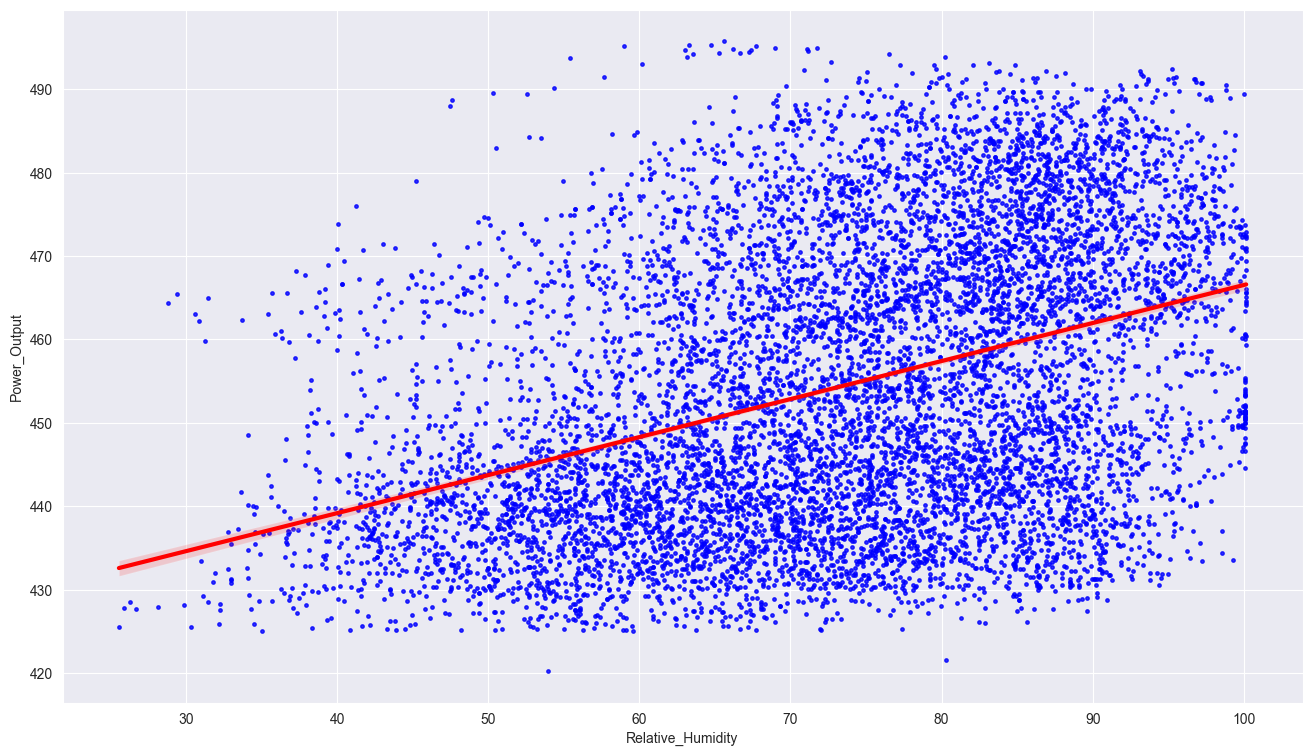

In [14]:
plt.figure(figsize=(16,9))
sns.set_style('darkgrid')
ax1=sns.regplot(x=df['Relative_Humidity'],y=df['Power_Output'],scatter_kws={'color':'b','s':6},line_kws={'color':'r','linewidth':3})

In [15]:
stats.linregress(x=ax1.get_lines()[0].get_xdata(),y=ax1.get_lines()[0].get_ydata())

LinregressResult(slope=0.4556501022629815, intercept=420.961766155484, rvalue=1.0, pvalue=0.0, stderr=0.0, intercept_stderr=0.0)

 **PO=0.4556*(RH)+420 **

 Rise in 1% of Relative Humidity increases the power output by 0.4556 MW/hr
 

# Ambient Pressure Vs Power output

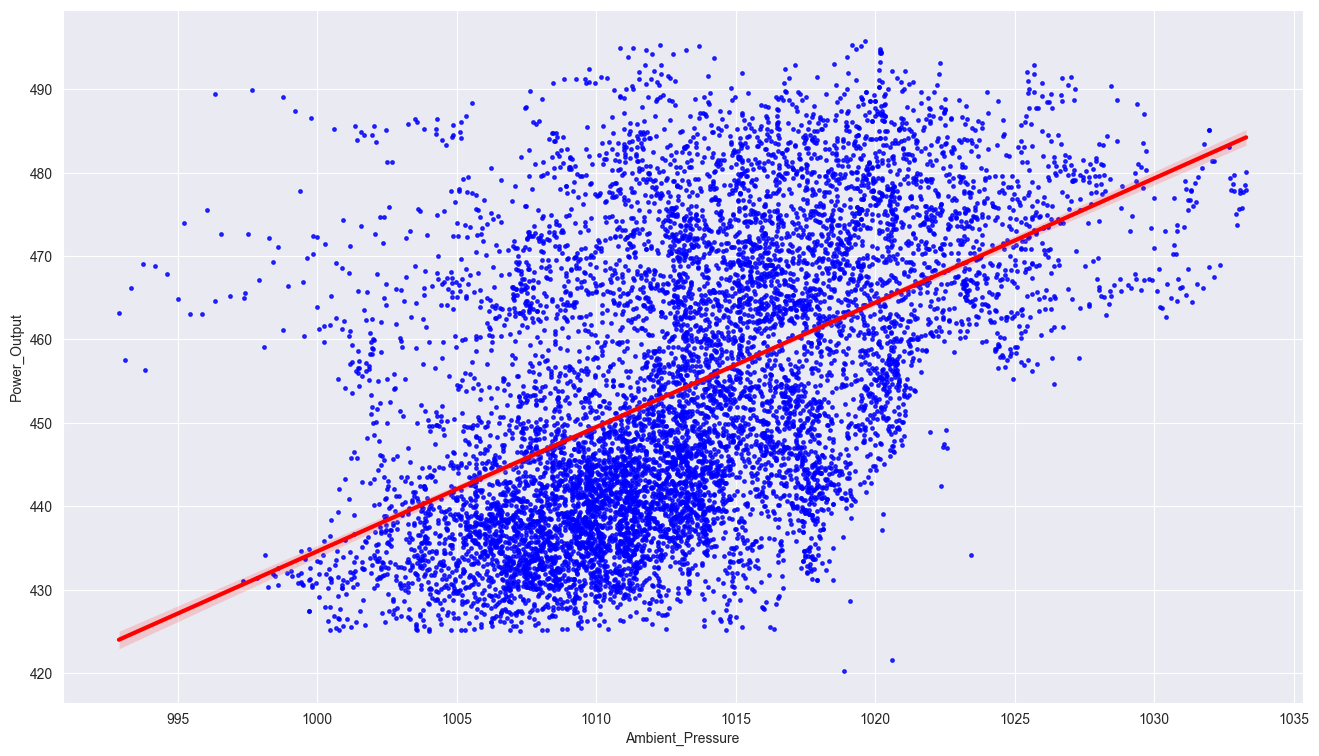

In [16]:
plt.figure(figsize=(16,9))
sns.set_style('darkgrid')
ax1=sns.regplot(x=df['Ambient_Pressure'],y=df['Power_Output'],scatter_kws={'color':'b','s':6},line_kws={'color':'r','linewidth':3})

In [17]:
stats.linregress(x=ax1.get_lines()[0].get_xdata(),y=ax1.get_lines()[0].get_ydata())

LinregressResult(slope=1.4898716733991113, intercept=-1055.260988984436, rvalue=0.9999999999999998, pvalue=0.0, stderr=3.17154542335253e-09, intercept_stderr=3.213294110166243e-06)

** PO = 1.489*(Ambient Pressure)-1055.26**

Rise in 1 millibar ambient Pressure Power output increses by 1.489 MW per Hour.

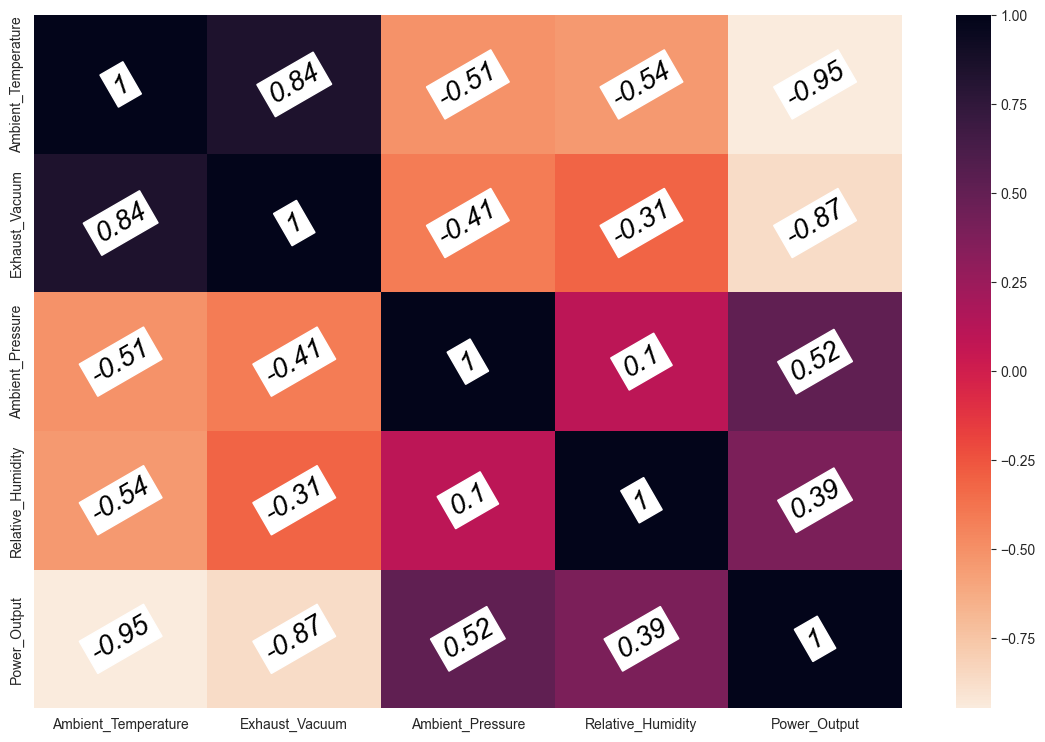

In [18]:
#Corelation between the features
plt.figure(figsize=(14,9))
annot_modify={'fontsize':20,'fontstyle':'italic','color':'k','rotation':30,'verticalalignment':'center',
                       'backgroundcolor':'w'}
sns.heatmap(df.corr(),annot=True,cmap='rocket_r',annot_kws=annot_modify)
plt.show()


<AxesSubplot: >

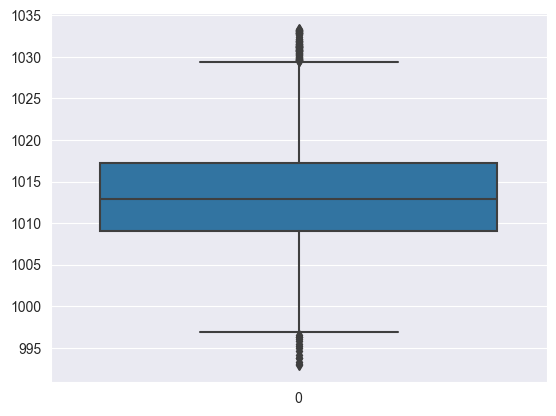

In [19]:
sns.boxplot(df['Ambient_Pressure'])

<AxesSubplot: >

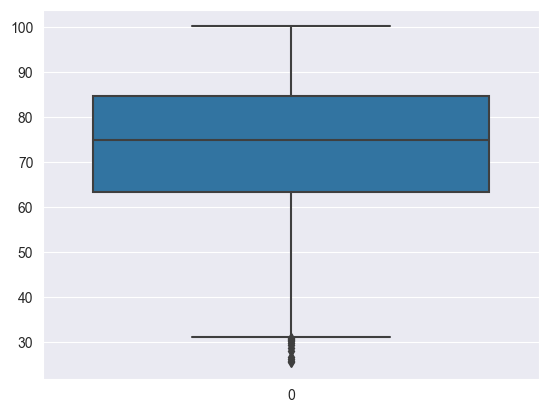

In [20]:
sns.boxplot(df['Relative_Humidity'])

<AxesSubplot: >

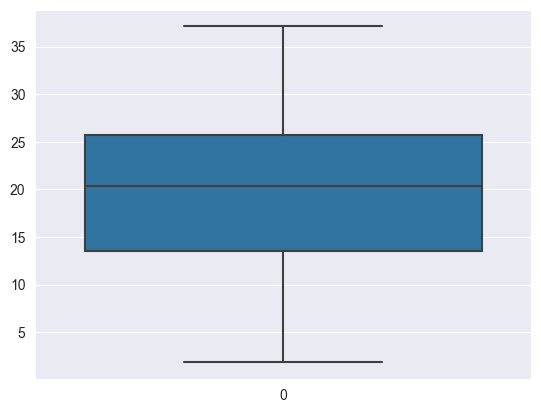

In [21]:
sns.boxplot(df['Ambient_Temperature'])

<AxesSubplot: >

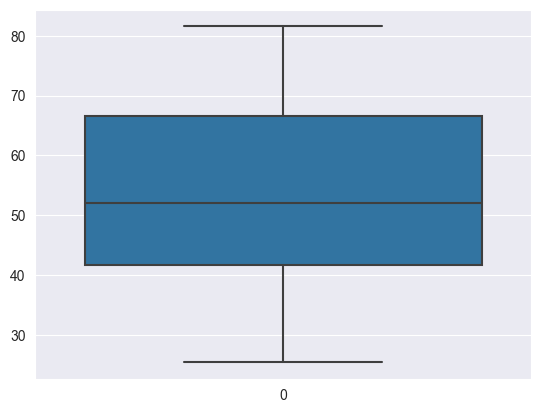

In [22]:
 sns.boxplot(df['Exhaust_Vacuum'])

In [23]:
def outliers(df,col):
   IQR=df[col].quantile(0.75)-df[col].quantile(0.25)
   min=df[col].quantile(0.25)-IQR*1.5
   max=df[col].quantile(0.75)+IQR*1.5
   df_out = df.loc[(df[col] > min) & (df[col] < max)]
   return(df_out)

   

In [24]:
df=outliers(df,'Ambient_Pressure')

<AxesSubplot: >

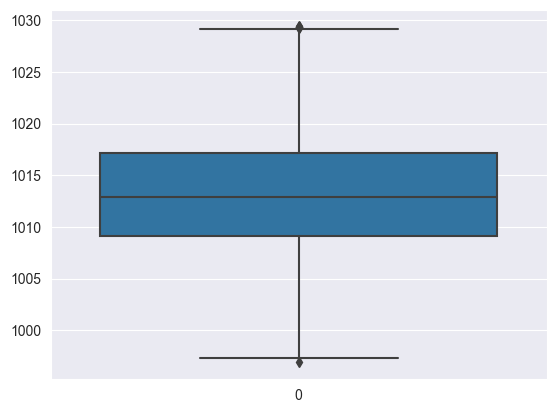

In [25]:
sns.boxplot(df['Ambient_Pressure'])

In [26]:
df=outliers(df,'Relative_Humidity')

<AxesSubplot: >

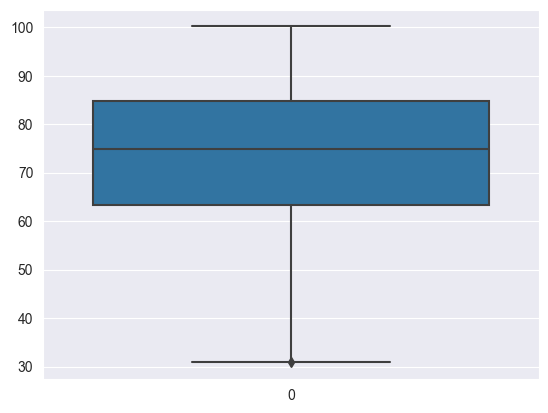

In [27]:
sns.boxplot(df['Relative_Humidity'])

In [28]:
df.shape

(9470, 5)

In [29]:
# plt.figure(figsize=(14,9))
# plt.subplot(121)
# sns.displot(df['Exhaust_Vacuum'])
# plt.subplot(122)
# stats.probplot(df['Exhaust_Vacuum'], dist="norm", plot=plt)

In [30]:
# for i in range(len(df.columns)):
#     sns.distplot(df.iloc[:,i])
#     plt.show()

In [31]:
X=df.drop(['Power_Output'],axis=1)
y=df['Power_Output']

In [32]:
X.columns
col=['Ambient_Temperature', 'Exhaust_Vacuum', 'Ambient_Pressure',
       'Relative_Humidity']
col[1]

'Exhaust_Vacuum'

C:\Users\rajak\AppData\Local\Temp\ipykernel_12348\3260321577.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X.iloc[:,i])
C:\Users\rajak\AppData\Local\Temp\ipykernel_12348\3260321577.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X.iloc[:,i])
C:\Users\rajak\AppData\Local\Temp\ipykernel_

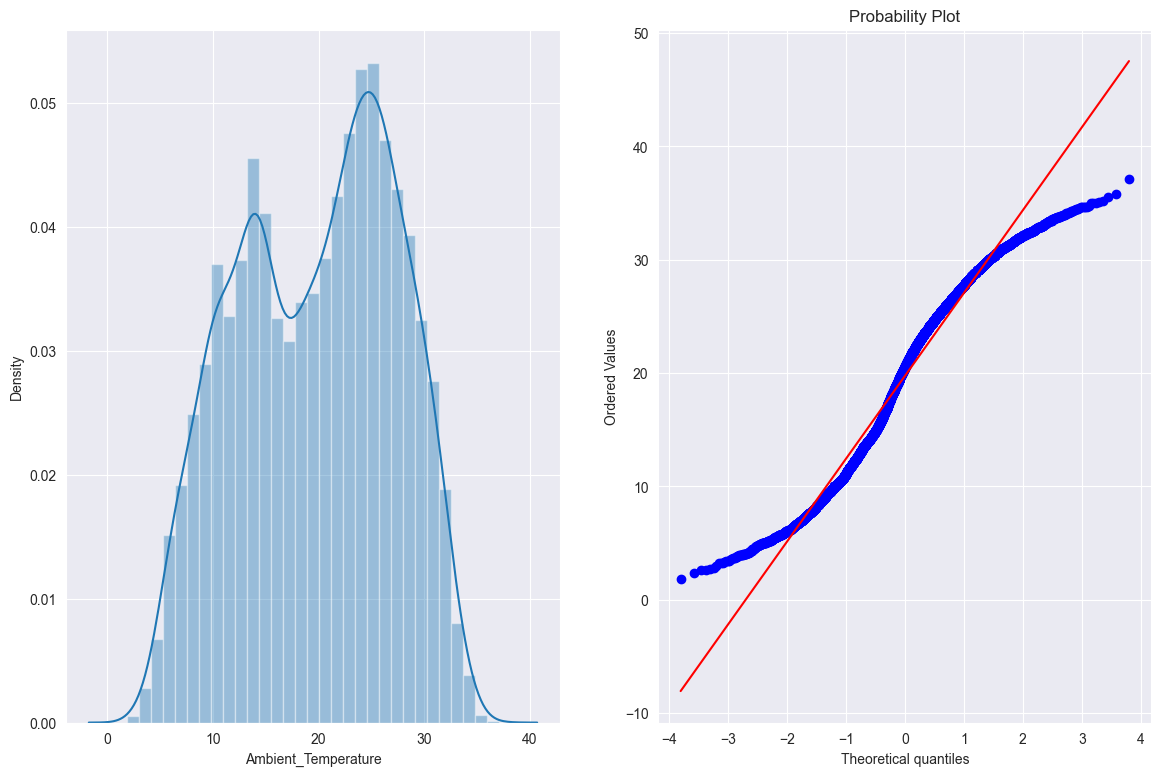

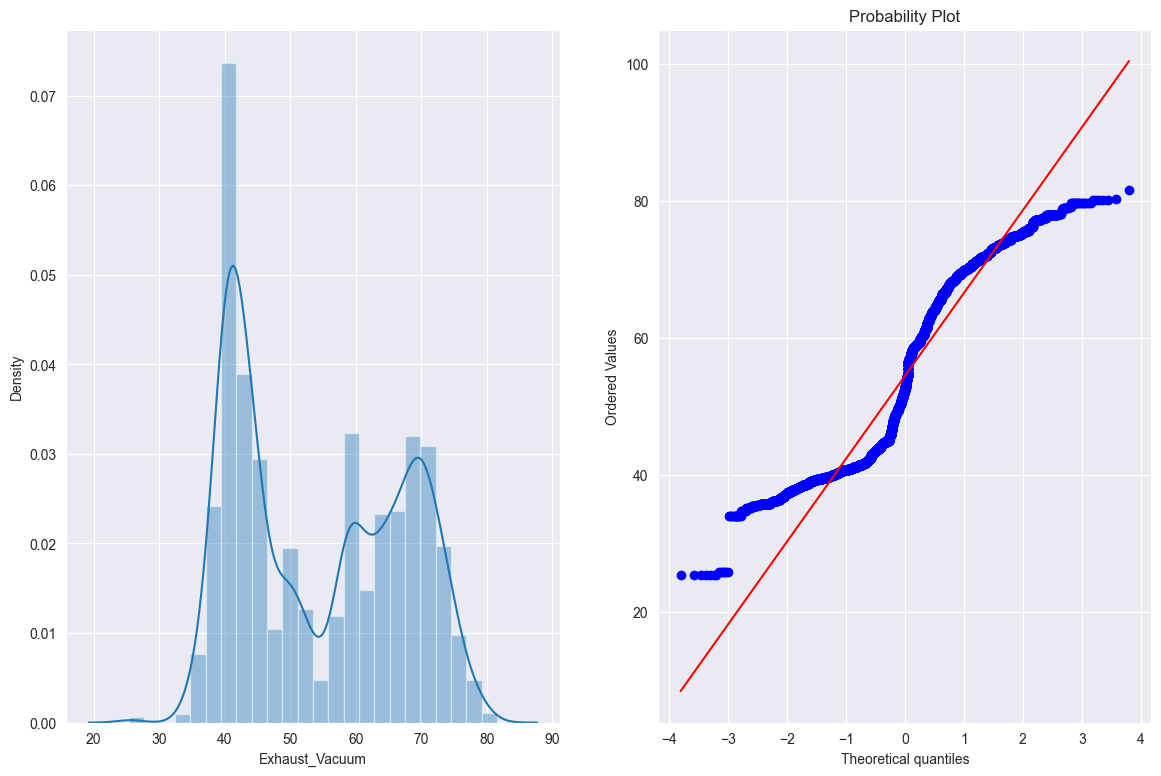

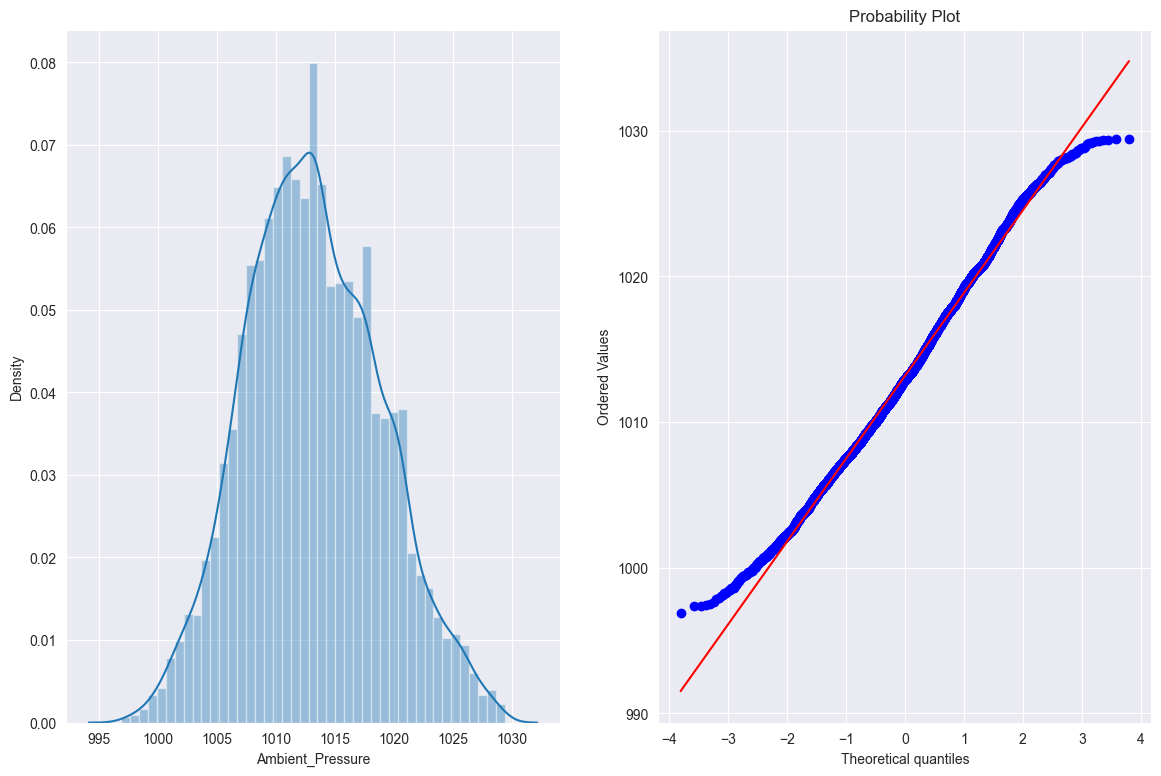

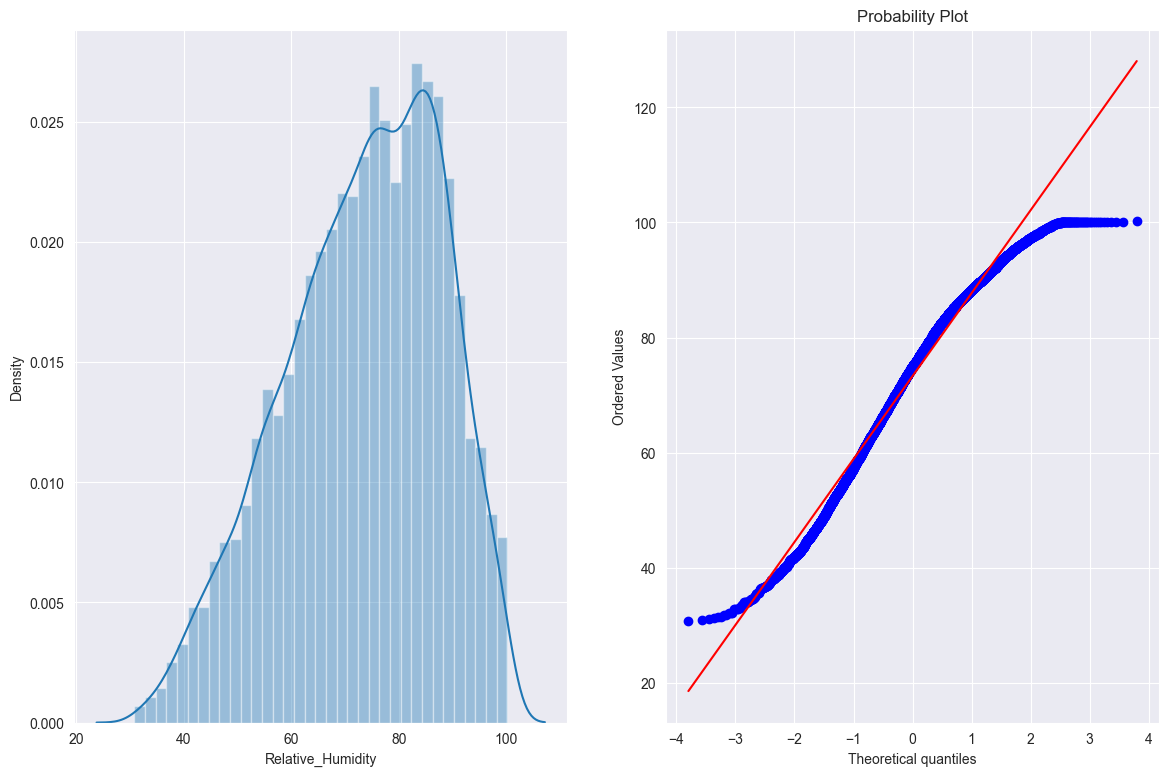

In [33]:
for i in range(len(X.columns)):
    plt.figure(figsize=(14,9))
    plt.subplot(1,2,1)
    sns.distplot(X.iloc[:,i])
    plt.subplot(1,2,2)
    stats.probplot(X.iloc[:,i], dist="norm", plot=plt)
   
    
    

In [34]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=44)

In [35]:
X_train.shape,X_test.shape



((7102, 4), (2368, 4))

<AxesSubplot: >

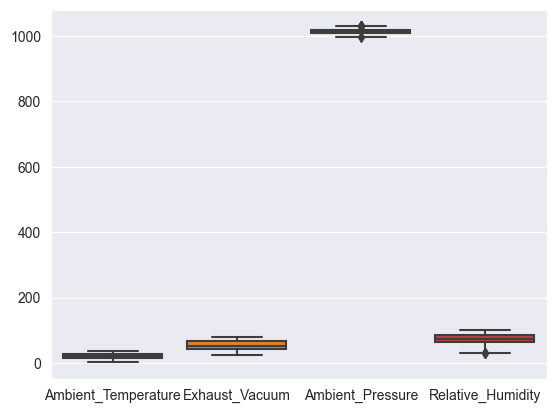

In [36]:
sns.boxplot(X_train)

In [37]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
pd.set_option('Display.max_columns',None)
pd.set_option('Display.max_rows',None)

In [38]:
#Standarized Data
stnd=StandardScaler()
X_train_stnd=X_train.copy()
X_test_stnd=X_test.copy()
col=['Ambient_Temperature', 'Exhaust_Vacuum', 'Ambient_Pressure',
       'Relative_Humidity']
for i in col:
    scale=stnd.fit(X_train_stnd[[i]])
    X_train_stnd[i]=scale.transform(X_train_stnd[[i]])
    X_test_stnd[i]=scale.transform(X_test_stnd[[i]])

In [39]:
norm = MinMaxScaler().fit(X_train)
X_train_norm = norm.transform(X_train)
X_test_norm = norm.transform(X_test)

Text(0.5, 1.0, 'Normalize')

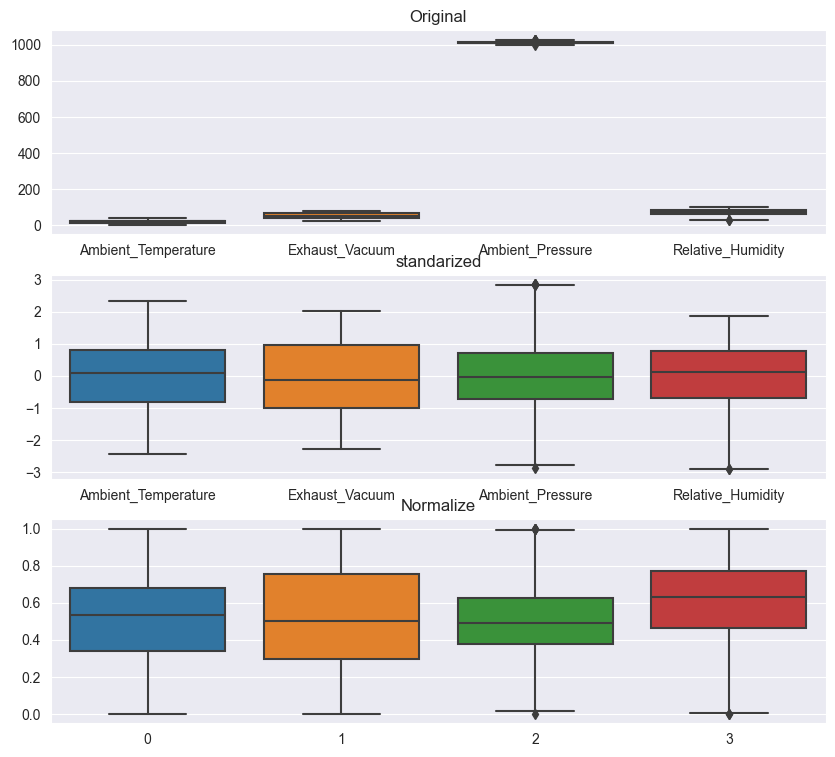

In [40]:
plt.figure(figsize=(10,9))
plt.subplot(3,1,1)
sns.boxplot(X_train)
plt.title('Original')
plt.subplot(3,1,2)
sns.boxplot(X_train_stnd)
plt.title('standarized')
plt.subplot(3,1,3)
sns.boxplot(X_train_norm)
plt.title('Normalize')

Goodness of Fit Test and Result

We test for significance of input features wrt Target feature using t-test hypothesis.

NULL HYPOTHESIS-**:H0:𝛽i=0**


ALTERNATE HYPOTHESIS-**:H0:𝛽i!=0**


Here 𝛽i is the slope 


In [41]:
from scipy.stats import linregress
for i in range(len(col)):
  print('Effect on Power output by: {}'.format(col[i]) )
  slope, intercept, r_value, p_value, std_err = linregress(X_train.iloc[:,i].values, y_train)
  t = slope / std_err
  p = (1 - stats.t.cdf(np.abs(t), len(X_train) - 2)) * 2
  alpha = 0.05 # set the significance level
  if p > alpha:
    print("Fail to reject the null hypothesis.")
  else:
    print("Reject the null hypothesis.")

Effect on Power output by: Ambient_Temperature
Reject the null hypothesis.
Effect on Power output by: Exhaust_Vacuum
Reject the null hypothesis.
Effect on Power output by: Ambient_Pressure
Reject the null hypothesis.
Effect on Power output by: Relative_Humidity
Reject the null hypothesis.


In [42]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression()

for i in range(len(col)):
  print('linear association between Power Output and {}'.format(col[i]))
  reg.fit(X_train.iloc[:,i].values.reshape(-1,1), y_train)
  print('Coefficients: ', reg.coef_)
  print('Intercept: ', reg.intercept_)
  print('Variance:',round(reg.score(X_test.iloc[:,i].values.reshape(-1,1),y_test)*100,2),'%')

linear association between Power Output and Ambient_Temperature
Coefficients:  [-2.1715084]
Intercept:  497.0764374725925
Variance: 90.53 %
linear association between Power Output and Exhaust_Vacuum
Coefficients:  [-1.1628621]
Intercept:  517.4065689558471
Variance: 74.79 %
linear association between Power Output and Ambient_Pressure
Coefficients:  [1.57467535]
Intercept:  -1141.3549402400959
Variance: 25.76 %
linear association between Power Output and Relative_Humidity
Coefficients:  [0.44995295]
Intercept:  421.1312942208489
Variance: 16.28 %



Ambient temperature is the most effective predictor variable

In [43]:
reg.fit(X_train, y_train)
  
# regression coefficients
print('Coefficients: ', reg.coef_)
print('Coefficients: ', reg.intercept_,)
  
  
# variance score: 1 means perfect prediction
print('Variance score: {}'.format(reg.score(X_test, y_test)))

Coefficients:  [-1.97245745 -0.23608072  0.06864653 -0.16180903]
Coefficients:  448.27330894950353
Variance score: 0.9332302388497218


In [44]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score


In [45]:
lr=LinearRegression()
knn=KNeighborsRegressor(n_neighbors=7)
sv=SVR()
dt=DecisionTreeRegressor()
rf=RandomForestRegressor()

In [46]:
est=[('lr',lr),('knn',knn),('sv',sv),('dt',dt),('rf',rf)]
train=[X_train,X_train_norm,X_train_stnd]
test=[X_test,X_test_norm,X_test_stnd]


In [47]:
for estimator in est:
  x = cross_val_score(estimator[1],X_train,y_train,cv=5)
  print(estimator[0],np.round(np.mean(x),5))    
  

lr 0.92622
knn 0.9415
sv 0.29108
dt 0.92439
rf 0.95889


In [48]:
for estimator in est:
  x = cross_val_score(estimator[1],X_train_norm,y_train,cv=5)
  print(estimator[0],np.round(np.mean(x),5)) 

lr 0.92622
knn 0.9463
sv 0.93797
dt 0.92431
rf 0.95874


In [49]:
for estimator in est:
  x = cross_val_score(estimator[1],X_train_stnd,y_train,cv=5)
  print(estimator[0],np.round(np.mean(x),5)) 

lr 0.92622
knn 0.94584
sv 0.93797
dt 0.92281
rf 0.95869


In [51]:
X_train_stnd.shape,X_train_norm.shape,X_train.shape,y_train.shape,X_test.shape,y_test.shape
for i in range(len(train)):
    print(train[i].shape)

(7102, 4)
(7102, 4)
(7102, 4)


In [52]:
rmse=[]
r2=[]
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
for i in range(len(train)):
    

    knn.fit(train[i],y_train)
    # predict
    pred = knn.predict(test[i])
   
    rmse.append(np.sqrt(mean_squared_error(y_test,pred)))
    r2.append(r2_score(y_test,pred))

# visualizing the result
df_knn = pd.DataFrame({'RMSE_knn':rmse , 'r2':r2},index=['Original','Normalized','Standardized'])
df_knn

,RMSE_knn,r2
Original,3.932123,0.946619
Normalized,3.798933,0.950174
Standardized,3.748463,0.951489


In [53]:
X.shape,y.shape


((9470, 4), (9470,))

In [54]:
rmse=[]
variance=[]
r2=[]
from sklearn.metrics import mean_squared_error
for i in range(len(train)):
    

    lr.fit(train[i],y_train)
    # predict
    pred = lr.predict(test[i])
    
   
    rmse.append(np.sqrt(mean_squared_error(y_test,pred)))
    r2.append(r2_score(y_test,pred))

# visualizing the result
df_lr = pd.DataFrame({'RMSE_lr':rmse,'R2':r2},index=['Original','Normalized','Standardized'])
df_lr

,RMSE_lr,R2
Original,4.397666,0.93323
Normalized,4.397666,0.93323
Standardized,4.397666,0.93323


In [55]:
rmse=[]
r2=[]
sv=SVR()
for i in range(len(train)):
    

    sv.fit(train[i],y_train)
    # predict
    pred = sv.predict(test[i])
   
    rmse.append(np.sqrt(mean_squared_error(y_test,pred)))
    r2.append(r2_score(y_test,pred))

# visualizing the result
df_sv = pd.DataFrame({'RMSE_sv':rmse,'R2':r2},index=['Original','Normalized','Standardized'])

In [56]:
rmse=[]
r2=[]
for i in range(len(train)):
    

    dt.fit(train[i],y_train)
    # predict
    pred = dt.predict(test[i])
   
    rmse.append(np.sqrt(mean_squared_error(y_test,pred)))
    r2.append(r2_score(y_test,pred))

# visualizing the result
df_sv = pd.DataFrame({'RMSE_rf':rmse,'R2':r2},index=['Original','Normalized','Standardized'])
df_sv

,RMSE_rf,R2
Original,4.731554,0.922707
Normalized,4.651568,0.925298
Standardized,4.724282,0.922944


In [57]:
rmse=[]
r2=[]
from sklearn.metrics import r2_score
for i in range(len(train)):
    

    rf.fit(train[i],y_train)
    # predict
    pred = rf.predict(test[i])
   
    rmse.append(np.sqrt(mean_squared_error(y_test,pred)))
    r2.append(r2_score(y_test,pred))


# visualizing the result
df_rf = pd.DataFrame({'RMSE_rf':rmse,'R2':r2},index=['Original','Normalized','Standardized'])
df_rf

,RMSE_rf,R2
Original,3.293712,0.962545
Normalized,3.292322,0.962577
Standardized,3.291240,0.962601


In [58]:
# params = {
#     'RandomForest':{
#         'model': RandomForestRegressor(),
#         'params':{
#             'n_estimators': [int(x) for x in np.linspace(start=1,stop=1200,num=10)],
#             'max_depth':[int(x) for x in np.linspace(start=1,stop=30,num=5)],
#             'criterion':['squared_error','absolute_error','friedman_mse','poisson'],
#              'min_samples_split':[2,3,4,5,10],
#             'min_samples_leaf':[1,2,3,4,5,6,10],
#             'max_features':['auto','sqrt'],
#             'ccp_alpha':[0.0,0.0185,0.0190,0.0195,0.0200],
#         }
#     },
    # int(x) for x in np.linspace(start=1,stop=30,num=5),
    
   
   
    # 'KNN':{
    #     'model':KNeighborsRegressor(),
    #     'params':{
    #         'n_neighbors':range(1, 15, 2),
    #         'weights':['uniform', 'distance'],
    #         'metric':['euclidean', 'manhattan', 'minkowski'],
    #         'leaf_size':list(range(1,50)),
    #         'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute']
    #     }
    # }
# }   

In [59]:
n_estimators = list(range(1,300))

# Number of features to consider at every split
max_features = [0.2,0.4,0.6,1.0,None]

# Maximum number of levels in tree
max_depth = [1,2,6,5,4,8,None]

# Number of samples
max_samples = [0.5,0.75,1.0,None]

# Bootstrap samples
bootstrap = [True,False]

# Minimum number of samples required to split a node
min_samples_split = [2,3,4,5,6,8]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2]
param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
              'max_samples':max_samples,
            #   'bootstrap':bootstrap,
              'min_samples_split':min_samples_split,
              'min_samples_leaf':min_samples_leaf
             }

In [60]:
from sklearn.model_selection import RandomizedSearchCV
# scores = []
# for model_name,mp in params.items():
    
#     clf = RandomizedSearchCV(mp['model'],param_distributions=mp['params'],cv=5,n_iter=10,n_jobs=-1)
#     clf.fit(X_train,y_train)
#     scores.append({
#         'model_name':model_name,
#         'best_score':clf.best_score_,
#         'best_estimator':clf.best_estimator_
#     })

rf_grid = RandomizedSearchCV(estimator = rf, 
                       param_distributions = param_grid, 
                       cv = 5, 
                       verbose=2,
                       n_jobs = -1,error_score='raise')
rf_grid.fit(X_train,y_train)


Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, error_score='raise', estimator=RandomForestRegressor(),
                   n_jobs=-1,
                   param_distributions={'max_depth': [1, 2, 6, 5, 4, 8, None],
                                        'max_features': [0.2, 0.4, 0.6, 1.0,
                                                         None],
                                        'max_samples': [0.5, 0.75, 1.0, None],
                                        'min_samples_leaf': [1, 2],
                                        'min_samples_split': [2, 3, 4, 5, 6, 8],
                                        'n_estimators': [1, 2, 3, 4, 5, 6, 7, 8,
                                                         9, 10, 11, 12, 13, 14,
                                                         15, 16, 17, 18, 19, 20,
                                                         21, 22, 23, 24, 25, 26,
                                                         27, 28, 29, 30, ...]},
                   verbose=2)

In [61]:
rf_grid.best_params_

{'n_estimators': 25,
 'min_samples_split': 2,
 'min_samples_leaf': 2,
 'max_samples': None,
 'max_features': 1.0,
 'max_depth': None}

In [62]:
rf=RandomForestRegressor(criterion='friedman_mse', max_depth=8, max_features=1.0,
                        min_samples_leaf=1,max_samples=0.75, min_samples_split=8,
                        n_estimators=133)
rf.fit(X_train_norm,y_train)
pred=rf.predict(X_test_norm)
print('RMSE:',np.sqrt(mean_squared_error(y_test,pred)))
print('r2_score:',r2_score(y_test,pred))

RMSE: 3.6555888859431676
r2_score: 0.9538629303888023


In [63]:
rf=RandomForestRegressor()
rf.fit(X_train_norm,y_train)
pred=rf.predict(X_test_norm)
print('RMSE:',np.sqrt(mean_squared_error(y_test,pred)))
print('r2_score:',r2_score(y_test,pred))

RMSE: 3.2909293682296594
r2_score: 0.9626085391466379


In [65]:
rmse=[]
r2=[]
from sklearn.metrics import r2_score
for i in range(len(train)):
    

    rf.fit(train[i],y_train)
    # predict
    pred = rf.predict(test[i])
   
    rmse.append(np.sqrt(mean_squared_error(y_test,pred)))
    r2.append(r2_score(y_test,pred))


# visualizing the result
df_rf = pd.DataFrame({'MSE_rf':rmse,'R2':r2},index=['Original','Normalized','Standardized'])
df_rf

,MSE_rf,R2
Original,3.289368,0.962644
Normalized,3.282840,0.962792
Standardized,3.293463,0.962551


In [66]:
rf1=RandomForestRegressor(n_estimators=100, criterion='squared_error', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=1.0, max_leaf_nodes=None, min_impurity_decrease=0.0, bootstrap=True, oob_score=False, n_jobs=None, random_state=None, verbose=0, warm_start=False, ccp_alpha=0.0, max_samples=None)

In [67]:
rf1.fit(X_train_norm,y_train)
pred=rf1.predict(X_test_norm)
print('MSE:',mean_squared_error(y_test,pred))
print('r2_score:',r2_score(y_test,pred))

MSE: 10.875510258606392
r2_score: 0.9624521605026577


In [68]:
predictions = rf1.predict(X_test_norm)
predictions_df = pd.DataFrame(np.ravel(predictions),columns=["Predictions"])
comparison_df = pd.concat([pd.DataFrame(np.ravel(y_test),columns=["Real Values"]), predictions_df],axis=1)
comparison_df 

,Real Values,Predictions
0,463.26,463.3616
1,475.90,475.2183
2,437.14,461.2328
3,460.59,463.1108
4,475.34,486.7491
5,456.13,458.3603
6,471.59,471.8122
7,475.03,471.6046
8,471.75,468.3080
9,448.65,448.6618


In [101]:
import tensorflow 
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping

In [102]:
model=Sequential()

In [103]:
model.add(Dense(4,activation='relu',input_dim=4,kernel_initializer='he_normal'))
model.add(Dense(6,activation='relu',kernel_initializer='he_normal'))
model.add(Dense(1,activation='linear'))

In [142]:
call=EarlyStopping(
monitor='val_loss',min_delta=0.01,
patience=20,verbose=1,mode='auto',baseline=None,restore_best_weights=False)

In [108]:
model.compile(loss='mean_squared_error',optimizer='adam',metrics=['accuracy'])

In [135]:
history=model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=3000)

Epoch 1/3000
222/222 [==============================] - 0s 972us/step - loss: 10823.4443 - accuracy: 0.0000e+00 - val_loss: 5553.6606 - val_accuracy: 0.0000e+00
Epoch 2/3000
222/222 [==============================] - 0s 902us/step - loss: 3701.2866 - accuracy: 0.0000e+00 - val_loss: 2828.4656 - val_accuracy: 0.0000e+00
Epoch 3/3000
222/222 [==============================] - 0s 893us/step - loss: 2126.5527 - accuracy: 0.0000e+00 - val_loss: 1926.7029 - val_accuracy: 0.0000e+00
Epoch 4/3000
222/222 [==============================] - 0s 959us/step - loss: 1503.2572 - accuracy: 0.0000e+00 - val_loss: 1338.0383 - val_accuracy: 0.0000e+00
Epoch 5/3000
222/222 [==============================] - 0s 907us/step - loss: 1170.1210 - accuracy: 0.0000e+00 - val_loss: 1096.6755 - val_accuracy: 0.0000e+00
Epoch 6/3000
222/222 [==============================] - 0s 903us/step - loss: 987.7661 - accuracy: 0.0000e+00 - val_loss: 935.3525 - val_accuracy: 0.0000e+00
Epoch 7/3000
222/222 [===================

222/222 [==============================] - 0s 947us/step - loss: 29.7134 - accuracy: 0.0000e+00 - val_loss: 34.8728 - val_accuracy: 0.0000e+00
Epoch 105/3000
222/222 [==============================] - 0s 990us/step - loss: 29.8827 - accuracy: 0.0000e+00 - val_loss: 26.7861 - val_accuracy: 0.0000e+00
Epoch 106/3000
222/222 [==============================] - 0s 959us/step - loss: 32.4790 - accuracy: 0.0000e+00 - val_loss: 26.5361 - val_accuracy: 0.0000e+00
Epoch 107/3000
222/222 [==============================] - 0s 977us/step - loss: 29.4430 - accuracy: 0.0000e+00 - val_loss: 30.5063 - val_accuracy: 0.0000e+00
Epoch 108/3000
222/222 [==============================] - 0s 973us/step - loss: 28.1111 - accuracy: 0.0000e+00 - val_loss: 29.6171 - val_accuracy: 0.0000e+00
Epoch 109/3000
222/222 [==============================] - 0s 953us/step - loss: 28.2938 - accuracy: 0.0000e+00 - val_loss: 26.7840 - val_accuracy: 0.0000e+00
Epoch 110/3000
222/222 [==============================] - 0s 975us/

Epoch 156/3000
222/222 [==============================] - 0s 897us/step - loss: 25.5474 - accuracy: 0.0000e+00 - val_loss: 25.9598 - val_accuracy: 0.0000e+00
Epoch 157/3000
222/222 [==============================] - 0s 892us/step - loss: 23.6382 - accuracy: 0.0000e+00 - val_loss: 21.4384 - val_accuracy: 0.0000e+00
Epoch 158/3000
222/222 [==============================] - 0s 892us/step - loss: 25.0154 - accuracy: 0.0000e+00 - val_loss: 20.8505 - val_accuracy: 0.0000e+00
Epoch 159/3000
222/222 [==============================] - 0s 908us/step - loss: 23.7742 - accuracy: 0.0000e+00 - val_loss: 21.3967 - val_accuracy: 0.0000e+00
Epoch 160/3000
222/222 [==============================] - 0s 904us/step - loss: 23.7892 - accuracy: 0.0000e+00 - val_loss: 20.9980 - val_accuracy: 0.0000e+00
Epoch 161/3000
222/222 [==============================] - 0s 895us/step - loss: 24.1446 - accuracy: 0.0000e+00 - val_loss: 20.6666 - val_accuracy: 0.0000e+00
Epoch 162/3000
222/222 [============================

Epoch 208/3000
222/222 [==============================] - 0s 912us/step - loss: 23.8993 - accuracy: 0.0000e+00 - val_loss: 20.5546 - val_accuracy: 0.0000e+00
Epoch 209/3000
222/222 [==============================] - 0s 905us/step - loss: 23.7424 - accuracy: 0.0000e+00 - val_loss: 20.7678 - val_accuracy: 0.0000e+00
Epoch 210/3000
222/222 [==============================] - 0s 919us/step - loss: 23.4741 - accuracy: 0.0000e+00 - val_loss: 20.9102 - val_accuracy: 0.0000e+00
Epoch 211/3000
222/222 [==============================] - 0s 917us/step - loss: 24.6625 - accuracy: 0.0000e+00 - val_loss: 25.4530 - val_accuracy: 0.0000e+00
Epoch 212/3000
222/222 [==============================] - 0s 928us/step - loss: 23.3511 - accuracy: 0.0000e+00 - val_loss: 22.1123 - val_accuracy: 0.0000e+00
Epoch 213/3000
222/222 [==============================] - 0s 915us/step - loss: 23.8787 - accuracy: 0.0000e+00 - val_loss: 21.5254 - val_accuracy: 0.0000e+00
Epoch 214/3000
222/222 [============================

222/222 [==============================] - 0s 899us/step - loss: 24.2153 - accuracy: 0.0000e+00 - val_loss: 29.6899 - val_accuracy: 0.0000e+00
Epoch 261/3000
222/222 [==============================] - 0s 896us/step - loss: 24.5480 - accuracy: 0.0000e+00 - val_loss: 20.5008 - val_accuracy: 0.0000e+00
Epoch 262/3000
222/222 [==============================] - 0s 899us/step - loss: 24.2261 - accuracy: 0.0000e+00 - val_loss: 20.6661 - val_accuracy: 0.0000e+00
Epoch 263/3000
222/222 [==============================] - 0s 897us/step - loss: 23.5531 - accuracy: 0.0000e+00 - val_loss: 22.0236 - val_accuracy: 0.0000e+00
Epoch 264/3000
222/222 [==============================] - 0s 912us/step - loss: 23.5869 - accuracy: 0.0000e+00 - val_loss: 20.8209 - val_accuracy: 0.0000e+00
Epoch 265/3000
222/222 [==============================] - 0s 1ms/step - loss: 23.2482 - accuracy: 0.0000e+00 - val_loss: 21.6085 - val_accuracy: 0.0000e+00
Epoch 266/3000
222/222 [==============================] - 0s 1ms/step

222/222 [==============================] - 0s 969us/step - loss: 24.4371 - accuracy: 0.0000e+00 - val_loss: 22.9471 - val_accuracy: 0.0000e+00
Epoch 313/3000
222/222 [==============================] - 0s 964us/step - loss: 24.2118 - accuracy: 0.0000e+00 - val_loss: 21.5743 - val_accuracy: 0.0000e+00
Epoch 314/3000
222/222 [==============================] - 0s 924us/step - loss: 24.0811 - accuracy: 0.0000e+00 - val_loss: 21.0159 - val_accuracy: 0.0000e+00
Epoch 315/3000
222/222 [==============================] - 0s 969us/step - loss: 24.0858 - accuracy: 0.0000e+00 - val_loss: 21.4159 - val_accuracy: 0.0000e+00
Epoch 316/3000
222/222 [==============================] - 0s 969us/step - loss: 23.2575 - accuracy: 0.0000e+00 - val_loss: 21.0472 - val_accuracy: 0.0000e+00
Epoch 317/3000
222/222 [==============================] - 0s 982us/step - loss: 23.0799 - accuracy: 0.0000e+00 - val_loss: 20.7370 - val_accuracy: 0.0000e+00
Epoch 318/3000
222/222 [==============================] - 0s 982us/

Epoch 364/3000
222/222 [==============================] - 0s 895us/step - loss: 25.7026 - accuracy: 0.0000e+00 - val_loss: 22.6467 - val_accuracy: 0.0000e+00
Epoch 365/3000
222/222 [==============================] - 0s 881us/step - loss: 23.0790 - accuracy: 0.0000e+00 - val_loss: 21.8870 - val_accuracy: 0.0000e+00
Epoch 366/3000
222/222 [==============================] - 0s 888us/step - loss: 23.5434 - accuracy: 0.0000e+00 - val_loss: 23.8645 - val_accuracy: 0.0000e+00
Epoch 367/3000
222/222 [==============================] - 0s 904us/step - loss: 23.3152 - accuracy: 0.0000e+00 - val_loss: 27.8217 - val_accuracy: 0.0000e+00
Epoch 368/3000
222/222 [==============================] - 0s 880us/step - loss: 24.2460 - accuracy: 0.0000e+00 - val_loss: 26.9004 - val_accuracy: 0.0000e+00
Epoch 369/3000
222/222 [==============================] - 0s 887us/step - loss: 24.1508 - accuracy: 0.0000e+00 - val_loss: 21.8262 - val_accuracy: 0.0000e+00
Epoch 370/3000
222/222 [============================

Epoch 416/3000
222/222 [==============================] - 0s 892us/step - loss: 24.8021 - accuracy: 0.0000e+00 - val_loss: 20.6658 - val_accuracy: 0.0000e+00
Epoch 417/3000
222/222 [==============================] - 0s 899us/step - loss: 24.2995 - accuracy: 0.0000e+00 - val_loss: 20.8271 - val_accuracy: 0.0000e+00
Epoch 418/3000
222/222 [==============================] - 0s 913us/step - loss: 24.1367 - accuracy: 0.0000e+00 - val_loss: 22.9669 - val_accuracy: 0.0000e+00
Epoch 419/3000
222/222 [==============================] - 0s 897us/step - loss: 22.9508 - accuracy: 0.0000e+00 - val_loss: 25.0958 - val_accuracy: 0.0000e+00
Epoch 420/3000
222/222 [==============================] - 0s 893us/step - loss: 23.2312 - accuracy: 0.0000e+00 - val_loss: 23.3675 - val_accuracy: 0.0000e+00
Epoch 421/3000
222/222 [==============================] - 0s 901us/step - loss: 23.5001 - accuracy: 0.0000e+00 - val_loss: 20.7770 - val_accuracy: 0.0000e+00
Epoch 422/3000
222/222 [============================

Epoch 468/3000
222/222 [==============================] - 0s 884us/step - loss: 23.3646 - accuracy: 0.0000e+00 - val_loss: 25.1169 - val_accuracy: 0.0000e+00
Epoch 469/3000
222/222 [==============================] - 0s 894us/step - loss: 24.8547 - accuracy: 0.0000e+00 - val_loss: 25.5511 - val_accuracy: 0.0000e+00
Epoch 470/3000
222/222 [==============================] - 0s 878us/step - loss: 23.7105 - accuracy: 0.0000e+00 - val_loss: 20.6468 - val_accuracy: 0.0000e+00
Epoch 471/3000
222/222 [==============================] - 0s 881us/step - loss: 23.9482 - accuracy: 0.0000e+00 - val_loss: 21.6138 - val_accuracy: 0.0000e+00
Epoch 472/3000
222/222 [==============================] - 0s 890us/step - loss: 23.0006 - accuracy: 0.0000e+00 - val_loss: 20.8828 - val_accuracy: 0.0000e+00
Epoch 473/3000
222/222 [==============================] - 0s 918us/step - loss: 23.2339 - accuracy: 0.0000e+00 - val_loss: 21.1243 - val_accuracy: 0.0000e+00
Epoch 474/3000
222/222 [============================

Epoch 520/3000
222/222 [==============================] - 0s 889us/step - loss: 23.4764 - accuracy: 0.0000e+00 - val_loss: 20.3549 - val_accuracy: 0.0000e+00
Epoch 521/3000
222/222 [==============================] - 0s 888us/step - loss: 23.3148 - accuracy: 0.0000e+00 - val_loss: 32.2719 - val_accuracy: 0.0000e+00
Epoch 522/3000
222/222 [==============================] - 0s 889us/step - loss: 23.3680 - accuracy: 0.0000e+00 - val_loss: 26.5235 - val_accuracy: 0.0000e+00
Epoch 523/3000
222/222 [==============================] - 0s 885us/step - loss: 23.9845 - accuracy: 0.0000e+00 - val_loss: 24.3562 - val_accuracy: 0.0000e+00
Epoch 524/3000
222/222 [==============================] - 0s 906us/step - loss: 23.7274 - accuracy: 0.0000e+00 - val_loss: 20.9070 - val_accuracy: 0.0000e+00
Epoch 525/3000
222/222 [==============================] - 0s 896us/step - loss: 23.7869 - accuracy: 0.0000e+00 - val_loss: 25.5083 - val_accuracy: 0.0000e+00
Epoch 526/3000
222/222 [============================

Epoch 572/3000
222/222 [==============================] - 0s 883us/step - loss: 23.8059 - accuracy: 0.0000e+00 - val_loss: 20.3399 - val_accuracy: 0.0000e+00
Epoch 573/3000
222/222 [==============================] - 0s 895us/step - loss: 23.6949 - accuracy: 0.0000e+00 - val_loss: 21.6960 - val_accuracy: 0.0000e+00
Epoch 574/3000
222/222 [==============================] - 0s 891us/step - loss: 23.8919 - accuracy: 0.0000e+00 - val_loss: 21.0641 - val_accuracy: 0.0000e+00
Epoch 575/3000
222/222 [==============================] - 0s 884us/step - loss: 23.4547 - accuracy: 0.0000e+00 - val_loss: 29.0385 - val_accuracy: 0.0000e+00
Epoch 576/3000
222/222 [==============================] - 0s 877us/step - loss: 24.7521 - accuracy: 0.0000e+00 - val_loss: 21.1118 - val_accuracy: 0.0000e+00
Epoch 577/3000
222/222 [==============================] - 0s 898us/step - loss: 23.2856 - accuracy: 0.0000e+00 - val_loss: 27.9448 - val_accuracy: 0.0000e+00
Epoch 578/3000
222/222 [============================

Epoch 624/3000
222/222 [==============================] - 0s 985us/step - loss: 23.4592 - accuracy: 0.0000e+00 - val_loss: 21.8935 - val_accuracy: 0.0000e+00
Epoch 625/3000
222/222 [==============================] - 0s 975us/step - loss: 23.4565 - accuracy: 0.0000e+00 - val_loss: 20.2967 - val_accuracy: 0.0000e+00
Epoch 626/3000
222/222 [==============================] - 0s 963us/step - loss: 23.6786 - accuracy: 0.0000e+00 - val_loss: 25.0664 - val_accuracy: 0.0000e+00
Epoch 627/3000
222/222 [==============================] - 0s 951us/step - loss: 22.8666 - accuracy: 0.0000e+00 - val_loss: 20.7108 - val_accuracy: 0.0000e+00
Epoch 628/3000
222/222 [==============================] - 0s 978us/step - loss: 24.6613 - accuracy: 0.0000e+00 - val_loss: 20.3601 - val_accuracy: 0.0000e+00
Epoch 629/3000
222/222 [==============================] - 0s 910us/step - loss: 24.6583 - accuracy: 0.0000e+00 - val_loss: 20.4548 - val_accuracy: 0.0000e+00
Epoch 630/3000
222/222 [============================

Epoch 676/3000
222/222 [==============================] - 0s 901us/step - loss: 23.2697 - accuracy: 0.0000e+00 - val_loss: 32.1016 - val_accuracy: 0.0000e+00
Epoch 677/3000
222/222 [==============================] - 0s 888us/step - loss: 23.9692 - accuracy: 0.0000e+00 - val_loss: 20.8280 - val_accuracy: 0.0000e+00
Epoch 678/3000
222/222 [==============================] - 0s 894us/step - loss: 22.9888 - accuracy: 0.0000e+00 - val_loss: 20.6589 - val_accuracy: 0.0000e+00
Epoch 679/3000
222/222 [==============================] - 0s 887us/step - loss: 24.2240 - accuracy: 0.0000e+00 - val_loss: 22.7421 - val_accuracy: 0.0000e+00
Epoch 680/3000
222/222 [==============================] - 0s 902us/step - loss: 23.2707 - accuracy: 0.0000e+00 - val_loss: 21.6222 - val_accuracy: 0.0000e+00
Epoch 681/3000
222/222 [==============================] - 0s 890us/step - loss: 23.3686 - accuracy: 0.0000e+00 - val_loss: 22.0985 - val_accuracy: 0.0000e+00
Epoch 682/3000
222/222 [============================

Epoch 728/3000
222/222 [==============================] - 0s 891us/step - loss: 23.0449 - accuracy: 0.0000e+00 - val_loss: 22.1056 - val_accuracy: 0.0000e+00
Epoch 729/3000
222/222 [==============================] - 0s 885us/step - loss: 23.6148 - accuracy: 0.0000e+00 - val_loss: 20.4976 - val_accuracy: 0.0000e+00
Epoch 730/3000
222/222 [==============================] - 0s 874us/step - loss: 22.9660 - accuracy: 0.0000e+00 - val_loss: 20.6596 - val_accuracy: 0.0000e+00
Epoch 731/3000
222/222 [==============================] - 0s 873us/step - loss: 23.5915 - accuracy: 0.0000e+00 - val_loss: 21.6295 - val_accuracy: 0.0000e+00
Epoch 732/3000
222/222 [==============================] - 0s 900us/step - loss: 22.9837 - accuracy: 0.0000e+00 - val_loss: 21.0314 - val_accuracy: 0.0000e+00
Epoch 733/3000
222/222 [==============================] - 0s 932us/step - loss: 22.7243 - accuracy: 0.0000e+00 - val_loss: 20.6269 - val_accuracy: 0.0000e+00
Epoch 734/3000
222/222 [============================

Epoch 780/3000
222/222 [==============================] - 0s 896us/step - loss: 23.1956 - accuracy: 0.0000e+00 - val_loss: 20.6852 - val_accuracy: 0.0000e+00
Epoch 781/3000
222/222 [==============================] - 0s 879us/step - loss: 23.2224 - accuracy: 0.0000e+00 - val_loss: 20.4878 - val_accuracy: 0.0000e+00
Epoch 782/3000
222/222 [==============================] - 0s 923us/step - loss: 23.5135 - accuracy: 0.0000e+00 - val_loss: 26.4303 - val_accuracy: 0.0000e+00
Epoch 783/3000
222/222 [==============================] - 0s 891us/step - loss: 24.0494 - accuracy: 0.0000e+00 - val_loss: 20.8765 - val_accuracy: 0.0000e+00
Epoch 784/3000
222/222 [==============================] - 0s 896us/step - loss: 22.6750 - accuracy: 0.0000e+00 - val_loss: 22.1876 - val_accuracy: 0.0000e+00
Epoch 785/3000
222/222 [==============================] - 0s 881us/step - loss: 23.1026 - accuracy: 0.0000e+00 - val_loss: 22.2005 - val_accuracy: 0.0000e+00
Epoch 786/3000
222/222 [============================

Epoch 832/3000
222/222 [==============================] - 0s 948us/step - loss: 23.7939 - accuracy: 0.0000e+00 - val_loss: 25.2571 - val_accuracy: 0.0000e+00
Epoch 833/3000
222/222 [==============================] - 0s 900us/step - loss: 23.6651 - accuracy: 0.0000e+00 - val_loss: 21.3661 - val_accuracy: 0.0000e+00
Epoch 834/3000
222/222 [==============================] - 0s 888us/step - loss: 23.8878 - accuracy: 0.0000e+00 - val_loss: 24.7336 - val_accuracy: 0.0000e+00
Epoch 835/3000
222/222 [==============================] - 0s 881us/step - loss: 23.2362 - accuracy: 0.0000e+00 - val_loss: 20.2558 - val_accuracy: 0.0000e+00
Epoch 836/3000
222/222 [==============================] - 0s 889us/step - loss: 22.9772 - accuracy: 0.0000e+00 - val_loss: 20.6848 - val_accuracy: 0.0000e+00
Epoch 837/3000
222/222 [==============================] - 0s 898us/step - loss: 23.0722 - accuracy: 0.0000e+00 - val_loss: 20.7143 - val_accuracy: 0.0000e+00
Epoch 838/3000
222/222 [============================

Epoch 884/3000
222/222 [==============================] - 0s 876us/step - loss: 23.3716 - accuracy: 0.0000e+00 - val_loss: 21.4185 - val_accuracy: 0.0000e+00
Epoch 885/3000
222/222 [==============================] - 0s 883us/step - loss: 22.5079 - accuracy: 0.0000e+00 - val_loss: 22.1269 - val_accuracy: 0.0000e+00
Epoch 886/3000
222/222 [==============================] - 0s 895us/step - loss: 24.0352 - accuracy: 0.0000e+00 - val_loss: 20.5833 - val_accuracy: 0.0000e+00
Epoch 887/3000
222/222 [==============================] - 0s 882us/step - loss: 23.4217 - accuracy: 0.0000e+00 - val_loss: 26.1826 - val_accuracy: 0.0000e+00
Epoch 888/3000
222/222 [==============================] - 0s 887us/step - loss: 23.9758 - accuracy: 0.0000e+00 - val_loss: 23.3415 - val_accuracy: 0.0000e+00
Epoch 889/3000
222/222 [==============================] - 0s 875us/step - loss: 23.5118 - accuracy: 0.0000e+00 - val_loss: 26.7715 - val_accuracy: 0.0000e+00
Epoch 890/3000
222/222 [============================

Epoch 936/3000
222/222 [==============================] - 0s 878us/step - loss: 23.1325 - accuracy: 0.0000e+00 - val_loss: 20.2231 - val_accuracy: 0.0000e+00
Epoch 937/3000
222/222 [==============================] - 0s 875us/step - loss: 23.6848 - accuracy: 0.0000e+00 - val_loss: 20.8559 - val_accuracy: 0.0000e+00
Epoch 938/3000
222/222 [==============================] - 0s 872us/step - loss: 23.0547 - accuracy: 0.0000e+00 - val_loss: 20.2367 - val_accuracy: 0.0000e+00
Epoch 939/3000
222/222 [==============================] - 0s 883us/step - loss: 23.4123 - accuracy: 0.0000e+00 - val_loss: 25.0957 - val_accuracy: 0.0000e+00
Epoch 940/3000
222/222 [==============================] - 0s 872us/step - loss: 23.2258 - accuracy: 0.0000e+00 - val_loss: 20.3363 - val_accuracy: 0.0000e+00
Epoch 941/3000
222/222 [==============================] - 0s 888us/step - loss: 23.0165 - accuracy: 0.0000e+00 - val_loss: 21.2020 - val_accuracy: 0.0000e+00
Epoch 942/3000
222/222 [============================

Epoch 988/3000
222/222 [==============================] - 0s 893us/step - loss: 22.8569 - accuracy: 0.0000e+00 - val_loss: 23.1796 - val_accuracy: 0.0000e+00
Epoch 989/3000
222/222 [==============================] - 0s 879us/step - loss: 23.6082 - accuracy: 0.0000e+00 - val_loss: 20.1955 - val_accuracy: 0.0000e+00
Epoch 990/3000
222/222 [==============================] - 0s 887us/step - loss: 22.7672 - accuracy: 0.0000e+00 - val_loss: 22.3613 - val_accuracy: 0.0000e+00
Epoch 991/3000
222/222 [==============================] - 0s 914us/step - loss: 24.5239 - accuracy: 0.0000e+00 - val_loss: 27.0588 - val_accuracy: 0.0000e+00
Epoch 992/3000
222/222 [==============================] - 0s 885us/step - loss: 24.5436 - accuracy: 0.0000e+00 - val_loss: 21.2970 - val_accuracy: 0.0000e+00
Epoch 993/3000
222/222 [==============================] - 0s 873us/step - loss: 23.5169 - accuracy: 0.0000e+00 - val_loss: 20.9191 - val_accuracy: 0.0000e+00
Epoch 994/3000
222/222 [============================

222/222 [==============================] - 0s 876us/step - loss: 22.8037 - accuracy: 0.0000e+00 - val_loss: 20.8142 - val_accuracy: 0.0000e+00
Epoch 1091/3000
222/222 [==============================] - 0s 888us/step - loss: 22.4687 - accuracy: 0.0000e+00 - val_loss: 20.9647 - val_accuracy: 0.0000e+00
Epoch 1092/3000
222/222 [==============================] - 0s 879us/step - loss: 23.4225 - accuracy: 0.0000e+00 - val_loss: 30.8835 - val_accuracy: 0.0000e+00
Epoch 1093/3000
222/222 [==============================] - 0s 917us/step - loss: 22.9894 - accuracy: 0.0000e+00 - val_loss: 20.4534 - val_accuracy: 0.0000e+00
Epoch 1094/3000
222/222 [==============================] - 0s 883us/step - loss: 23.8274 - accuracy: 0.0000e+00 - val_loss: 20.1606 - val_accuracy: 0.0000e+00
Epoch 1095/3000
222/222 [==============================] - 0s 882us/step - loss: 23.3732 - accuracy: 0.0000e+00 - val_loss: 20.0963 - val_accuracy: 0.0000e+00
Epoch 1096/3000
222/222 [==============================] - 0s 

222/222 [==============================] - 0s 885us/step - loss: 22.1323 - accuracy: 0.0000e+00 - val_loss: 20.4121 - val_accuracy: 0.0000e+00
Epoch 1193/3000
222/222 [==============================] - 0s 886us/step - loss: 22.6906 - accuracy: 0.0000e+00 - val_loss: 22.8431 - val_accuracy: 0.0000e+00
Epoch 1194/3000
222/222 [==============================] - 0s 869us/step - loss: 23.3260 - accuracy: 0.0000e+00 - val_loss: 19.9891 - val_accuracy: 0.0000e+00
Epoch 1195/3000
222/222 [==============================] - 0s 888us/step - loss: 23.6185 - accuracy: 0.0000e+00 - val_loss: 20.1486 - val_accuracy: 0.0000e+00
Epoch 1196/3000
222/222 [==============================] - 0s 892us/step - loss: 23.0101 - accuracy: 0.0000e+00 - val_loss: 21.5290 - val_accuracy: 0.0000e+00
Epoch 1197/3000
222/222 [==============================] - 0s 877us/step - loss: 23.2144 - accuracy: 0.0000e+00 - val_loss: 20.6098 - val_accuracy: 0.0000e+00
Epoch 1198/3000
222/222 [==============================] - 0s 

222/222 [==============================] - 0s 881us/step - loss: 22.8760 - accuracy: 0.0000e+00 - val_loss: 20.1814 - val_accuracy: 0.0000e+00
Epoch 1295/3000
222/222 [==============================] - 0s 885us/step - loss: 23.6892 - accuracy: 0.0000e+00 - val_loss: 20.3709 - val_accuracy: 0.0000e+00
Epoch 1296/3000
222/222 [==============================] - 0s 884us/step - loss: 23.2422 - accuracy: 0.0000e+00 - val_loss: 22.6645 - val_accuracy: 0.0000e+00
Epoch 1297/3000
222/222 [==============================] - 0s 887us/step - loss: 22.3348 - accuracy: 0.0000e+00 - val_loss: 21.0669 - val_accuracy: 0.0000e+00
Epoch 1298/3000
222/222 [==============================] - 0s 881us/step - loss: 23.6129 - accuracy: 0.0000e+00 - val_loss: 26.2279 - val_accuracy: 0.0000e+00
Epoch 1299/3000
222/222 [==============================] - 0s 883us/step - loss: 23.0667 - accuracy: 0.0000e+00 - val_loss: 19.9876 - val_accuracy: 0.0000e+00
Epoch 1300/3000
222/222 [==============================] - 0s 

222/222 [==============================] - 0s 886us/step - loss: 22.7612 - accuracy: 0.0000e+00 - val_loss: 20.1873 - val_accuracy: 0.0000e+00
Epoch 1397/3000
222/222 [==============================] - 0s 878us/step - loss: 22.3648 - accuracy: 0.0000e+00 - val_loss: 20.5167 - val_accuracy: 0.0000e+00
Epoch 1398/3000
222/222 [==============================] - 0s 884us/step - loss: 22.7939 - accuracy: 0.0000e+00 - val_loss: 22.5008 - val_accuracy: 0.0000e+00
Epoch 1399/3000
222/222 [==============================] - 0s 897us/step - loss: 23.2702 - accuracy: 0.0000e+00 - val_loss: 21.3825 - val_accuracy: 0.0000e+00
Epoch 1400/3000
222/222 [==============================] - 0s 906us/step - loss: 22.3065 - accuracy: 0.0000e+00 - val_loss: 20.0741 - val_accuracy: 0.0000e+00
Epoch 1401/3000
222/222 [==============================] - 0s 890us/step - loss: 23.6645 - accuracy: 0.0000e+00 - val_loss: 20.1673 - val_accuracy: 0.0000e+00
Epoch 1402/3000
222/222 [==============================] - 0s 

222/222 [==============================] - 0s 907us/step - loss: 23.3221 - accuracy: 0.0000e+00 - val_loss: 20.0581 - val_accuracy: 0.0000e+00
Epoch 1499/3000
222/222 [==============================] - 0s 874us/step - loss: 23.4154 - accuracy: 0.0000e+00 - val_loss: 19.8671 - val_accuracy: 0.0000e+00
Epoch 1500/3000
222/222 [==============================] - 0s 883us/step - loss: 22.6456 - accuracy: 0.0000e+00 - val_loss: 24.4401 - val_accuracy: 0.0000e+00
Epoch 1501/3000
222/222 [==============================] - 0s 903us/step - loss: 22.7503 - accuracy: 0.0000e+00 - val_loss: 19.9274 - val_accuracy: 0.0000e+00
Epoch 1502/3000
222/222 [==============================] - 0s 872us/step - loss: 23.2147 - accuracy: 0.0000e+00 - val_loss: 20.5629 - val_accuracy: 0.0000e+00
Epoch 1503/3000
222/222 [==============================] - 0s 894us/step - loss: 22.6995 - accuracy: 0.0000e+00 - val_loss: 20.0505 - val_accuracy: 0.0000e+00
Epoch 1504/3000
222/222 [==============================] - 0s 

222/222 [==============================] - 0s 888us/step - loss: 22.5747 - accuracy: 0.0000e+00 - val_loss: 20.3452 - val_accuracy: 0.0000e+00
Epoch 1601/3000
222/222 [==============================] - 0s 883us/step - loss: 22.5612 - accuracy: 0.0000e+00 - val_loss: 22.8885 - val_accuracy: 0.0000e+00
Epoch 1602/3000
222/222 [==============================] - 0s 881us/step - loss: 22.6897 - accuracy: 0.0000e+00 - val_loss: 20.1980 - val_accuracy: 0.0000e+00
Epoch 1603/3000
222/222 [==============================] - 0s 888us/step - loss: 23.2335 - accuracy: 0.0000e+00 - val_loss: 21.1588 - val_accuracy: 0.0000e+00
Epoch 1604/3000
222/222 [==============================] - 0s 881us/step - loss: 23.2519 - accuracy: 0.0000e+00 - val_loss: 20.8905 - val_accuracy: 0.0000e+00
Epoch 1605/3000
222/222 [==============================] - 0s 875us/step - loss: 23.5318 - accuracy: 0.0000e+00 - val_loss: 23.2994 - val_accuracy: 0.0000e+00
Epoch 1606/3000
222/222 [==============================] - 0s 

222/222 [==============================] - 0s 886us/step - loss: 22.6816 - accuracy: 0.0000e+00 - val_loss: 22.7280 - val_accuracy: 0.0000e+00
Epoch 1703/3000
222/222 [==============================] - 0s 890us/step - loss: 22.9694 - accuracy: 0.0000e+00 - val_loss: 21.9560 - val_accuracy: 0.0000e+00
Epoch 1704/3000
222/222 [==============================] - 0s 875us/step - loss: 22.9748 - accuracy: 0.0000e+00 - val_loss: 20.7556 - val_accuracy: 0.0000e+00
Epoch 1705/3000
222/222 [==============================] - 0s 875us/step - loss: 23.6046 - accuracy: 0.0000e+00 - val_loss: 21.1249 - val_accuracy: 0.0000e+00
Epoch 1706/3000
222/222 [==============================] - 0s 888us/step - loss: 23.0060 - accuracy: 0.0000e+00 - val_loss: 19.8554 - val_accuracy: 0.0000e+00
Epoch 1707/3000
222/222 [==============================] - 0s 894us/step - loss: 22.5092 - accuracy: 0.0000e+00 - val_loss: 19.8392 - val_accuracy: 0.0000e+00
Epoch 1708/3000
222/222 [==============================] - 0s 

Epoch 1805/3000
222/222 [==============================] - 0s 907us/step - loss: 22.3550 - accuracy: 0.0000e+00 - val_loss: 21.0519 - val_accuracy: 0.0000e+00
Epoch 1806/3000
222/222 [==============================] - 0s 878us/step - loss: 22.4842 - accuracy: 0.0000e+00 - val_loss: 20.7557 - val_accuracy: 0.0000e+00
Epoch 1807/3000
222/222 [==============================] - 0s 883us/step - loss: 22.8082 - accuracy: 0.0000e+00 - val_loss: 20.2069 - val_accuracy: 0.0000e+00
Epoch 1808/3000
222/222 [==============================] - 0s 888us/step - loss: 22.3923 - accuracy: 0.0000e+00 - val_loss: 36.9249 - val_accuracy: 0.0000e+00
Epoch 1809/3000
222/222 [==============================] - 0s 886us/step - loss: 22.5815 - accuracy: 0.0000e+00 - val_loss: 22.1883 - val_accuracy: 0.0000e+00
Epoch 1810/3000
222/222 [==============================] - 0s 953us/step - loss: 22.1104 - accuracy: 0.0000e+00 - val_loss: 20.9204 - val_accuracy: 0.0000e+00
Epoch 1811/3000
222/222 [=====================

222/222 [==============================] - 0s 932us/step - loss: 22.9404 - accuracy: 0.0000e+00 - val_loss: 20.2923 - val_accuracy: 0.0000e+00
Epoch 1908/3000
222/222 [==============================] - 0s 919us/step - loss: 22.7479 - accuracy: 0.0000e+00 - val_loss: 20.2889 - val_accuracy: 0.0000e+00
Epoch 1909/3000
222/222 [==============================] - 0s 938us/step - loss: 22.5134 - accuracy: 0.0000e+00 - val_loss: 23.5664 - val_accuracy: 0.0000e+00
Epoch 1910/3000
222/222 [==============================] - 0s 910us/step - loss: 22.6936 - accuracy: 0.0000e+00 - val_loss: 20.1249 - val_accuracy: 0.0000e+00
Epoch 1911/3000
222/222 [==============================] - 0s 905us/step - loss: 23.3064 - accuracy: 0.0000e+00 - val_loss: 22.6274 - val_accuracy: 0.0000e+00
Epoch 1912/3000
222/222 [==============================] - 0s 896us/step - loss: 22.3110 - accuracy: 0.0000e+00 - val_loss: 19.7171 - val_accuracy: 0.0000e+00
Epoch 1913/3000
222/222 [==============================] - 0s 

222/222 [==============================] - 0s 945us/step - loss: 22.7271 - accuracy: 0.0000e+00 - val_loss: 19.9801 - val_accuracy: 0.0000e+00
Epoch 2010/3000
222/222 [==============================] - 0s 882us/step - loss: 22.3049 - accuracy: 0.0000e+00 - val_loss: 19.8763 - val_accuracy: 0.0000e+00
Epoch 2011/3000
222/222 [==============================] - 0s 882us/step - loss: 23.6663 - accuracy: 0.0000e+00 - val_loss: 26.2100 - val_accuracy: 0.0000e+00
Epoch 2012/3000
222/222 [==============================] - 0s 871us/step - loss: 22.5344 - accuracy: 0.0000e+00 - val_loss: 20.9537 - val_accuracy: 0.0000e+00
Epoch 2013/3000
222/222 [==============================] - 0s 883us/step - loss: 22.3426 - accuracy: 0.0000e+00 - val_loss: 20.7289 - val_accuracy: 0.0000e+00
Epoch 2014/3000
222/222 [==============================] - 0s 868us/step - loss: 22.5348 - accuracy: 0.0000e+00 - val_loss: 20.0607 - val_accuracy: 0.0000e+00
Epoch 2015/3000
222/222 [==============================] - 0s 

222/222 [==============================] - 0s 883us/step - loss: 22.6580 - accuracy: 0.0000e+00 - val_loss: 20.0234 - val_accuracy: 0.0000e+00
Epoch 2112/3000
222/222 [==============================] - 0s 882us/step - loss: 22.7714 - accuracy: 0.0000e+00 - val_loss: 21.3363 - val_accuracy: 0.0000e+00
Epoch 2113/3000
222/222 [==============================] - 0s 887us/step - loss: 22.1995 - accuracy: 0.0000e+00 - val_loss: 20.0115 - val_accuracy: 0.0000e+00
Epoch 2114/3000
222/222 [==============================] - 0s 889us/step - loss: 22.5012 - accuracy: 0.0000e+00 - val_loss: 21.0990 - val_accuracy: 0.0000e+00
Epoch 2115/3000
222/222 [==============================] - 0s 883us/step - loss: 22.2855 - accuracy: 0.0000e+00 - val_loss: 19.6134 - val_accuracy: 0.0000e+00
Epoch 2116/3000
222/222 [==============================] - 0s 892us/step - loss: 23.0025 - accuracy: 0.0000e+00 - val_loss: 21.8716 - val_accuracy: 0.0000e+00
Epoch 2117/3000
222/222 [==============================] - 0s 

222/222 [==============================] - 0s 914us/step - loss: 22.5597 - accuracy: 0.0000e+00 - val_loss: 20.2436 - val_accuracy: 0.0000e+00
Epoch 2214/3000
222/222 [==============================] - 0s 899us/step - loss: 22.8557 - accuracy: 0.0000e+00 - val_loss: 20.0471 - val_accuracy: 0.0000e+00
Epoch 2215/3000
222/222 [==============================] - 0s 885us/step - loss: 22.6248 - accuracy: 0.0000e+00 - val_loss: 21.6360 - val_accuracy: 0.0000e+00
Epoch 2216/3000
222/222 [==============================] - 0s 901us/step - loss: 22.7561 - accuracy: 0.0000e+00 - val_loss: 20.1987 - val_accuracy: 0.0000e+00
Epoch 2217/3000
222/222 [==============================] - 0s 905us/step - loss: 22.5263 - accuracy: 0.0000e+00 - val_loss: 19.6499 - val_accuracy: 0.0000e+00
Epoch 2218/3000
222/222 [==============================] - 0s 884us/step - loss: 22.5779 - accuracy: 0.0000e+00 - val_loss: 19.9019 - val_accuracy: 0.0000e+00
Epoch 2219/3000
222/222 [==============================] - 0s 

222/222 [==============================] - 0s 894us/step - loss: 22.7156 - accuracy: 0.0000e+00 - val_loss: 20.5768 - val_accuracy: 0.0000e+00
Epoch 2316/3000
222/222 [==============================] - 0s 919us/step - loss: 23.1899 - accuracy: 0.0000e+00 - val_loss: 19.8189 - val_accuracy: 0.0000e+00
Epoch 2317/3000
222/222 [==============================] - 0s 895us/step - loss: 23.1711 - accuracy: 0.0000e+00 - val_loss: 19.8805 - val_accuracy: 0.0000e+00
Epoch 2318/3000
222/222 [==============================] - 0s 895us/step - loss: 22.5748 - accuracy: 0.0000e+00 - val_loss: 20.6099 - val_accuracy: 0.0000e+00
Epoch 2319/3000
222/222 [==============================] - 0s 897us/step - loss: 22.3909 - accuracy: 0.0000e+00 - val_loss: 25.5134 - val_accuracy: 0.0000e+00
Epoch 2320/3000
222/222 [==============================] - 0s 871us/step - loss: 22.6967 - accuracy: 0.0000e+00 - val_loss: 19.8068 - val_accuracy: 0.0000e+00
Epoch 2321/3000
222/222 [==============================] - 0s 

222/222 [==============================] - 0s 897us/step - loss: 22.4169 - accuracy: 0.0000e+00 - val_loss: 20.1509 - val_accuracy: 0.0000e+00
Epoch 2418/3000
222/222 [==============================] - 0s 881us/step - loss: 22.8973 - accuracy: 0.0000e+00 - val_loss: 21.2812 - val_accuracy: 0.0000e+00
Epoch 2419/3000
222/222 [==============================] - 0s 873us/step - loss: 22.5765 - accuracy: 0.0000e+00 - val_loss: 19.8194 - val_accuracy: 0.0000e+00
Epoch 2420/3000
222/222 [==============================] - 0s 892us/step - loss: 22.3010 - accuracy: 0.0000e+00 - val_loss: 20.6276 - val_accuracy: 0.0000e+00
Epoch 2421/3000
222/222 [==============================] - 0s 883us/step - loss: 22.2475 - accuracy: 0.0000e+00 - val_loss: 19.6376 - val_accuracy: 0.0000e+00
Epoch 2422/3000
222/222 [==============================] - 0s 876us/step - loss: 22.8405 - accuracy: 0.0000e+00 - val_loss: 21.6964 - val_accuracy: 0.0000e+00
Epoch 2423/3000
222/222 [==============================] - 0s 

222/222 [==============================] - 0s 896us/step - loss: 22.3144 - accuracy: 0.0000e+00 - val_loss: 19.8428 - val_accuracy: 0.0000e+00
Epoch 2520/3000
222/222 [==============================] - 0s 884us/step - loss: 22.7015 - accuracy: 0.0000e+00 - val_loss: 26.6747 - val_accuracy: 0.0000e+00
Epoch 2521/3000
222/222 [==============================] - 0s 884us/step - loss: 22.3004 - accuracy: 0.0000e+00 - val_loss: 19.8629 - val_accuracy: 0.0000e+00
Epoch 2522/3000
222/222 [==============================] - 0s 896us/step - loss: 22.2661 - accuracy: 0.0000e+00 - val_loss: 19.9328 - val_accuracy: 0.0000e+00
Epoch 2523/3000
222/222 [==============================] - 0s 896us/step - loss: 22.0749 - accuracy: 0.0000e+00 - val_loss: 24.3609 - val_accuracy: 0.0000e+00
Epoch 2524/3000
222/222 [==============================] - 0s 887us/step - loss: 22.2823 - accuracy: 0.0000e+00 - val_loss: 20.6682 - val_accuracy: 0.0000e+00
Epoch 2525/3000
222/222 [==============================] - 0s 

222/222 [==============================] - 0s 887us/step - loss: 23.2611 - accuracy: 0.0000e+00 - val_loss: 20.2545 - val_accuracy: 0.0000e+00
Epoch 2622/3000
222/222 [==============================] - 0s 883us/step - loss: 22.1404 - accuracy: 0.0000e+00 - val_loss: 19.9485 - val_accuracy: 0.0000e+00
Epoch 2623/3000
222/222 [==============================] - 0s 896us/step - loss: 22.5153 - accuracy: 0.0000e+00 - val_loss: 22.2492 - val_accuracy: 0.0000e+00
Epoch 2624/3000
222/222 [==============================] - 0s 887us/step - loss: 22.0091 - accuracy: 0.0000e+00 - val_loss: 21.6793 - val_accuracy: 0.0000e+00
Epoch 2625/3000
222/222 [==============================] - 0s 887us/step - loss: 22.4814 - accuracy: 0.0000e+00 - val_loss: 19.7174 - val_accuracy: 0.0000e+00
Epoch 2626/3000
222/222 [==============================] - 0s 887us/step - loss: 22.4632 - accuracy: 0.0000e+00 - val_loss: 23.3987 - val_accuracy: 0.0000e+00
Epoch 2627/3000
222/222 [==============================] - 0s 

222/222 [==============================] - 0s 923us/step - loss: 22.3306 - accuracy: 0.0000e+00 - val_loss: 21.0178 - val_accuracy: 0.0000e+00
Epoch 2724/3000
222/222 [==============================] - 0s 908us/step - loss: 22.5248 - accuracy: 0.0000e+00 - val_loss: 21.0202 - val_accuracy: 0.0000e+00
Epoch 2725/3000
222/222 [==============================] - 0s 888us/step - loss: 22.1620 - accuracy: 0.0000e+00 - val_loss: 19.7054 - val_accuracy: 0.0000e+00
Epoch 2726/3000
222/222 [==============================] - 0s 880us/step - loss: 22.7516 - accuracy: 0.0000e+00 - val_loss: 25.4625 - val_accuracy: 0.0000e+00
Epoch 2727/3000
222/222 [==============================] - 0s 883us/step - loss: 22.2051 - accuracy: 0.0000e+00 - val_loss: 19.6791 - val_accuracy: 0.0000e+00
Epoch 2728/3000
222/222 [==============================] - 0s 871us/step - loss: 22.6668 - accuracy: 0.0000e+00 - val_loss: 22.7832 - val_accuracy: 0.0000e+00
Epoch 2729/3000
222/222 [==============================] - 0s 

222/222 [==============================] - 0s 898us/step - loss: 22.4174 - accuracy: 0.0000e+00 - val_loss: 20.0336 - val_accuracy: 0.0000e+00
Epoch 2826/3000
222/222 [==============================] - 0s 897us/step - loss: 22.3297 - accuracy: 0.0000e+00 - val_loss: 19.8544 - val_accuracy: 0.0000e+00
Epoch 2827/3000
222/222 [==============================] - 0s 886us/step - loss: 22.0829 - accuracy: 0.0000e+00 - val_loss: 19.7509 - val_accuracy: 0.0000e+00
Epoch 2828/3000
222/222 [==============================] - 0s 887us/step - loss: 22.1225 - accuracy: 0.0000e+00 - val_loss: 19.5400 - val_accuracy: 0.0000e+00
Epoch 2829/3000
222/222 [==============================] - 0s 944us/step - loss: 22.1724 - accuracy: 0.0000e+00 - val_loss: 22.4547 - val_accuracy: 0.0000e+00
Epoch 2830/3000
222/222 [==============================] - 0s 915us/step - loss: 22.1399 - accuracy: 0.0000e+00 - val_loss: 20.2999 - val_accuracy: 0.0000e+00
Epoch 2831/3000
222/222 [==============================] - 0s 

222/222 [==============================] - 0s 932us/step - loss: 21.4788 - accuracy: 0.0000e+00 - val_loss: 19.9092 - val_accuracy: 0.0000e+00
Epoch 2928/3000
222/222 [==============================] - 0s 896us/step - loss: 22.0217 - accuracy: 0.0000e+00 - val_loss: 20.2178 - val_accuracy: 0.0000e+00
Epoch 2929/3000
222/222 [==============================] - 0s 893us/step - loss: 22.3336 - accuracy: 0.0000e+00 - val_loss: 20.3143 - val_accuracy: 0.0000e+00
Epoch 2930/3000
222/222 [==============================] - 0s 923us/step - loss: 22.0233 - accuracy: 0.0000e+00 - val_loss: 21.3524 - val_accuracy: 0.0000e+00
Epoch 2931/3000
222/222 [==============================] - 0s 950us/step - loss: 23.3783 - accuracy: 0.0000e+00 - val_loss: 22.5599 - val_accuracy: 0.0000e+00
Epoch 2932/3000
222/222 [==============================] - 0s 941us/step - loss: 22.3579 - accuracy: 0.0000e+00 - val_loss: 22.8358 - val_accuracy: 0.0000e+00
Epoch 2933/3000
222/222 [==============================] - 0s 

In [137]:
model.evaluate(X_train,y_train)

222/222 [==============================] - 0s 577us/step - loss: 25.5254 - accuracy: 0.0000e+00


[25.525392532348633, 0.0]

In [139]:
predictions = model.predict(X_test)
predictions_df = pd.DataFrame(np.ravel(predictions),columns=["Predictions"])
comparison_df = pd.concat([pd.DataFrame(np.ravel(y_test),columns=["Real Values"]), predictions_df],axis=1)
comparison_df 

74/74 [==============================] - 0s 507us/step


,Real Values,Predictions
0,463.26,471.871399
1,475.90,476.530151
2,437.14,463.141907
3,460.59,463.144318
4,475.34,482.390137
...,...,...
2363,467.55,472.630890
2364,437.38,443.080139
2365,460.03,461.143372
2366,431.83,433.096405


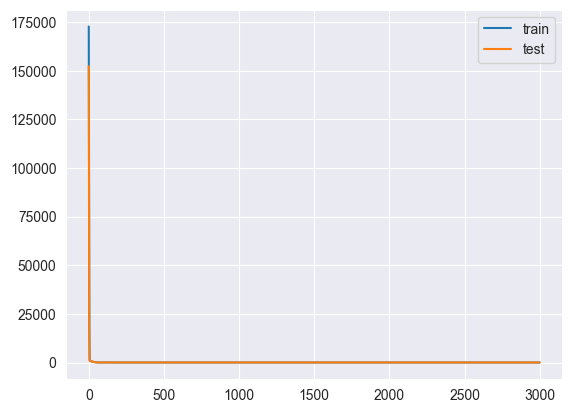

In [115]:
plt.plot(history.history['loss'],label='train')
plt.plot(history.history['val_loss'],label='test')
plt.legend()
plt.show()

In [141]:
history=model.fit(X_train_norm,y_train,validation_data=(X_test_norm,y_test),epochs=3000)

Epoch 1/3000
222/222 [==============================] - 0s 979us/step - loss: 2200.7852 - accuracy: 0.0000e+00 - val_loss: 38.8296 - val_accuracy: 0.0000e+00
Epoch 2/3000
222/222 [==============================] - 0s 897us/step - loss: 33.9390 - accuracy: 0.0000e+00 - val_loss: 31.7440 - val_accuracy: 0.0000e+00
Epoch 3/3000
222/222 [==============================] - 0s 905us/step - loss: 32.4619 - accuracy: 0.0000e+00 - val_loss: 31.2153 - val_accuracy: 0.0000e+00
Epoch 4/3000
222/222 [==============================] - 0s 896us/step - loss: 31.9286 - accuracy: 0.0000e+00 - val_loss: 30.6880 - val_accuracy: 0.0000e+00
Epoch 5/3000
222/222 [==============================] - 0s 919us/step - loss: 31.3540 - accuracy: 0.0000e+00 - val_loss: 30.1331 - val_accuracy: 0.0000e+00
Epoch 6/3000
222/222 [==============================] - 0s 913us/step - loss: 30.7706 - accuracy: 0.0000e+00 - val_loss: 29.5578 - val_accuracy: 0.0000e+00
Epoch 7/3000
222/222 [==============================] - 0s 905

222/222 [==============================] - 0s 900us/step - loss: 19.3332 - accuracy: 0.0000e+00 - val_loss: 17.6842 - val_accuracy: 0.0000e+00
Epoch 106/3000
222/222 [==============================] - 0s 882us/step - loss: 19.3632 - accuracy: 0.0000e+00 - val_loss: 17.7272 - val_accuracy: 0.0000e+00
Epoch 107/3000
222/222 [==============================] - 0s 883us/step - loss: 19.3348 - accuracy: 0.0000e+00 - val_loss: 17.6803 - val_accuracy: 0.0000e+00
Epoch 108/3000
222/222 [==============================] - 0s 879us/step - loss: 19.3154 - accuracy: 0.0000e+00 - val_loss: 17.6725 - val_accuracy: 0.0000e+00
Epoch 109/3000
222/222 [==============================] - 0s 878us/step - loss: 19.4006 - accuracy: 0.0000e+00 - val_loss: 17.7810 - val_accuracy: 0.0000e+00
Epoch 110/3000
222/222 [==============================] - 0s 905us/step - loss: 19.3134 - accuracy: 0.0000e+00 - val_loss: 17.8352 - val_accuracy: 0.0000e+00
Epoch 111/3000
222/222 [==============================] - 0s 909us/

Epoch 157/3000
222/222 [==============================] - 0s 892us/step - loss: 19.1844 - accuracy: 0.0000e+00 - val_loss: 17.3862 - val_accuracy: 0.0000e+00
Epoch 158/3000
222/222 [==============================] - 0s 884us/step - loss: 19.0969 - accuracy: 0.0000e+00 - val_loss: 17.4948 - val_accuracy: 0.0000e+00
Epoch 159/3000
222/222 [==============================] - 0s 876us/step - loss: 19.0850 - accuracy: 0.0000e+00 - val_loss: 17.3959 - val_accuracy: 0.0000e+00
Epoch 160/3000
222/222 [==============================] - 0s 888us/step - loss: 19.0941 - accuracy: 0.0000e+00 - val_loss: 17.3610 - val_accuracy: 0.0000e+00
Epoch 161/3000
222/222 [==============================] - 0s 919us/step - loss: 19.0623 - accuracy: 0.0000e+00 - val_loss: 17.5399 - val_accuracy: 0.0000e+00
Epoch 162/3000
222/222 [==============================] - 0s 888us/step - loss: 19.0721 - accuracy: 0.0000e+00 - val_loss: 17.3528 - val_accuracy: 0.0000e+00
Epoch 163/3000
222/222 [============================

Epoch 209/3000
222/222 [==============================] - 0s 917us/step - loss: 19.0637 - accuracy: 0.0000e+00 - val_loss: 17.4143 - val_accuracy: 0.0000e+00
Epoch 210/3000
222/222 [==============================] - 0s 932us/step - loss: 19.1200 - accuracy: 0.0000e+00 - val_loss: 17.3401 - val_accuracy: 0.0000e+00
Epoch 211/3000
222/222 [==============================] - 0s 932us/step - loss: 19.0015 - accuracy: 0.0000e+00 - val_loss: 17.3497 - val_accuracy: 0.0000e+00
Epoch 212/3000
222/222 [==============================] - 0s 911us/step - loss: 18.9982 - accuracy: 0.0000e+00 - val_loss: 17.3746 - val_accuracy: 0.0000e+00
Epoch 213/3000
222/222 [==============================] - 0s 897us/step - loss: 19.0391 - accuracy: 0.0000e+00 - val_loss: 17.5938 - val_accuracy: 0.0000e+00
Epoch 214/3000
222/222 [==============================] - 0s 904us/step - loss: 19.0233 - accuracy: 0.0000e+00 - val_loss: 17.3258 - val_accuracy: 0.0000e+00
Epoch 215/3000
222/222 [============================

Epoch 261/3000
222/222 [==============================] - 0s 914us/step - loss: 19.0495 - accuracy: 0.0000e+00 - val_loss: 17.3173 - val_accuracy: 0.0000e+00
Epoch 262/3000
222/222 [==============================] - 0s 887us/step - loss: 19.0334 - accuracy: 0.0000e+00 - val_loss: 17.3279 - val_accuracy: 0.0000e+00
Epoch 263/3000
222/222 [==============================] - 0s 883us/step - loss: 19.0023 - accuracy: 0.0000e+00 - val_loss: 17.3403 - val_accuracy: 0.0000e+00
Epoch 264/3000
222/222 [==============================] - 0s 883us/step - loss: 19.0327 - accuracy: 0.0000e+00 - val_loss: 17.3151 - val_accuracy: 0.0000e+00
Epoch 265/3000
222/222 [==============================] - 0s 891us/step - loss: 19.0872 - accuracy: 0.0000e+00 - val_loss: 17.4179 - val_accuracy: 0.0000e+00
Epoch 266/3000
222/222 [==============================] - 0s 882us/step - loss: 18.9677 - accuracy: 0.0000e+00 - val_loss: 17.2983 - val_accuracy: 0.0000e+00
Epoch 267/3000
222/222 [============================

Epoch 313/3000
222/222 [==============================] - 0s 911us/step - loss: 19.0342 - accuracy: 0.0000e+00 - val_loss: 17.2805 - val_accuracy: 0.0000e+00
Epoch 314/3000
222/222 [==============================] - 0s 886us/step - loss: 18.9708 - accuracy: 0.0000e+00 - val_loss: 17.2675 - val_accuracy: 0.0000e+00
Epoch 315/3000
222/222 [==============================] - 0s 899us/step - loss: 18.9992 - accuracy: 0.0000e+00 - val_loss: 17.7985 - val_accuracy: 0.0000e+00
Epoch 316/3000
222/222 [==============================] - 0s 952us/step - loss: 18.9729 - accuracy: 0.0000e+00 - val_loss: 17.2576 - val_accuracy: 0.0000e+00
Epoch 317/3000
222/222 [==============================] - 0s 871us/step - loss: 19.0239 - accuracy: 0.0000e+00 - val_loss: 17.2582 - val_accuracy: 0.0000e+00
Epoch 318/3000
222/222 [==============================] - 0s 870us/step - loss: 19.0181 - accuracy: 0.0000e+00 - val_loss: 17.6798 - val_accuracy: 0.0000e+00
Epoch 319/3000
222/222 [============================

Epoch 365/3000
222/222 [==============================] - 0s 927us/step - loss: 18.9947 - accuracy: 0.0000e+00 - val_loss: 17.2403 - val_accuracy: 0.0000e+00
Epoch 366/3000
222/222 [==============================] - 0s 961us/step - loss: 18.9519 - accuracy: 0.0000e+00 - val_loss: 17.2290 - val_accuracy: 0.0000e+00
Epoch 367/3000
222/222 [==============================] - 0s 1ms/step - loss: 18.9610 - accuracy: 0.0000e+00 - val_loss: 17.4044 - val_accuracy: 0.0000e+00
Epoch 368/3000
222/222 [==============================] - 0s 964us/step - loss: 18.9532 - accuracy: 0.0000e+00 - val_loss: 17.3357 - val_accuracy: 0.0000e+00
Epoch 369/3000
222/222 [==============================] - 0s 932us/step - loss: 18.9456 - accuracy: 0.0000e+00 - val_loss: 17.3837 - val_accuracy: 0.0000e+00
Epoch 370/3000
222/222 [==============================] - 0s 914us/step - loss: 19.0480 - accuracy: 0.0000e+00 - val_loss: 17.3963 - val_accuracy: 0.0000e+00
Epoch 371/3000
222/222 [==============================

Epoch 417/3000
222/222 [==============================] - 0s 969us/step - loss: 18.9849 - accuracy: 0.0000e+00 - val_loss: 17.2922 - val_accuracy: 0.0000e+00
Epoch 418/3000
222/222 [==============================] - 0s 973us/step - loss: 18.9893 - accuracy: 0.0000e+00 - val_loss: 17.3713 - val_accuracy: 0.0000e+00
Epoch 419/3000
222/222 [==============================] - 0s 914us/step - loss: 18.9464 - accuracy: 0.0000e+00 - val_loss: 17.2690 - val_accuracy: 0.0000e+00
Epoch 420/3000
222/222 [==============================] - 0s 892us/step - loss: 18.9600 - accuracy: 0.0000e+00 - val_loss: 17.2902 - val_accuracy: 0.0000e+00
Epoch 421/3000
222/222 [==============================] - 0s 910us/step - loss: 18.9513 - accuracy: 0.0000e+00 - val_loss: 17.2853 - val_accuracy: 0.0000e+00
Epoch 422/3000
222/222 [==============================] - 0s 901us/step - loss: 18.9950 - accuracy: 0.0000e+00 - val_loss: 17.3451 - val_accuracy: 0.0000e+00
Epoch 423/3000
222/222 [============================

Epoch 469/3000
222/222 [==============================] - 0s 878us/step - loss: 18.9116 - accuracy: 0.0000e+00 - val_loss: 17.2107 - val_accuracy: 0.0000e+00
Epoch 470/3000
222/222 [==============================] - 0s 878us/step - loss: 18.9650 - accuracy: 0.0000e+00 - val_loss: 17.4338 - val_accuracy: 0.0000e+00
Epoch 471/3000
222/222 [==============================] - 0s 873us/step - loss: 18.9672 - accuracy: 0.0000e+00 - val_loss: 17.2039 - val_accuracy: 0.0000e+00
Epoch 472/3000
222/222 [==============================] - 0s 874us/step - loss: 18.9213 - accuracy: 0.0000e+00 - val_loss: 17.2396 - val_accuracy: 0.0000e+00
Epoch 473/3000
222/222 [==============================] - 0s 873us/step - loss: 18.9509 - accuracy: 0.0000e+00 - val_loss: 17.2705 - val_accuracy: 0.0000e+00
Epoch 474/3000
222/222 [==============================] - 0s 869us/step - loss: 19.0140 - accuracy: 0.0000e+00 - val_loss: 17.2060 - val_accuracy: 0.0000e+00
Epoch 475/3000
222/222 [============================

Epoch 521/3000
222/222 [==============================] - 0s 914us/step - loss: 19.0097 - accuracy: 0.0000e+00 - val_loss: 17.4995 - val_accuracy: 0.0000e+00
Epoch 522/3000
222/222 [==============================] - 0s 878us/step - loss: 18.9842 - accuracy: 0.0000e+00 - val_loss: 17.1885 - val_accuracy: 0.0000e+00
Epoch 523/3000
222/222 [==============================] - 0s 901us/step - loss: 18.9444 - accuracy: 0.0000e+00 - val_loss: 17.2218 - val_accuracy: 0.0000e+00
Epoch 524/3000
222/222 [==============================] - 0s 928us/step - loss: 18.9343 - accuracy: 0.0000e+00 - val_loss: 17.1860 - val_accuracy: 0.0000e+00
Epoch 525/3000
222/222 [==============================] - 0s 928us/step - loss: 18.9104 - accuracy: 0.0000e+00 - val_loss: 17.2787 - val_accuracy: 0.0000e+00
Epoch 526/3000
222/222 [==============================] - 0s 928us/step - loss: 18.9724 - accuracy: 0.0000e+00 - val_loss: 17.2972 - val_accuracy: 0.0000e+00
Epoch 527/3000
222/222 [============================

Epoch 573/3000
222/222 [==============================] - 0s 881us/step - loss: 18.9877 - accuracy: 0.0000e+00 - val_loss: 17.1776 - val_accuracy: 0.0000e+00
Epoch 574/3000
222/222 [==============================] - 0s 886us/step - loss: 18.8903 - accuracy: 0.0000e+00 - val_loss: 17.2053 - val_accuracy: 0.0000e+00
Epoch 575/3000
222/222 [==============================] - 0s 887us/step - loss: 19.0120 - accuracy: 0.0000e+00 - val_loss: 17.2045 - val_accuracy: 0.0000e+00
Epoch 576/3000
222/222 [==============================] - 0s 886us/step - loss: 18.9334 - accuracy: 0.0000e+00 - val_loss: 17.6362 - val_accuracy: 0.0000e+00
Epoch 577/3000
222/222 [==============================] - 0s 1ms/step - loss: 18.9629 - accuracy: 0.0000e+00 - val_loss: 17.3350 - val_accuracy: 0.0000e+00
Epoch 578/3000
222/222 [==============================] - 0s 901us/step - loss: 18.9254 - accuracy: 0.0000e+00 - val_loss: 17.1762 - val_accuracy: 0.0000e+00
Epoch 579/3000
222/222 [==============================

Epoch 625/3000
222/222 [==============================] - 0s 882us/step - loss: 18.9258 - accuracy: 0.0000e+00 - val_loss: 17.1919 - val_accuracy: 0.0000e+00
Epoch 626/3000
222/222 [==============================] - 0s 876us/step - loss: 18.9245 - accuracy: 0.0000e+00 - val_loss: 17.1762 - val_accuracy: 0.0000e+00
Epoch 627/3000
222/222 [==============================] - 0s 871us/step - loss: 18.9651 - accuracy: 0.0000e+00 - val_loss: 17.1988 - val_accuracy: 0.0000e+00
Epoch 628/3000
222/222 [==============================] - 0s 888us/step - loss: 18.9301 - accuracy: 0.0000e+00 - val_loss: 17.1774 - val_accuracy: 0.0000e+00
Epoch 629/3000
222/222 [==============================] - 0s 881us/step - loss: 18.9306 - accuracy: 0.0000e+00 - val_loss: 17.2625 - val_accuracy: 0.0000e+00
Epoch 630/3000
222/222 [==============================] - 0s 874us/step - loss: 18.9601 - accuracy: 0.0000e+00 - val_loss: 18.1819 - val_accuracy: 0.0000e+00
Epoch 631/3000
222/222 [============================

Epoch 677/3000
222/222 [==============================] - 0s 890us/step - loss: 18.9896 - accuracy: 0.0000e+00 - val_loss: 17.1935 - val_accuracy: 0.0000e+00
Epoch 678/3000
222/222 [==============================] - 0s 888us/step - loss: 18.9801 - accuracy: 0.0000e+00 - val_loss: 17.3263 - val_accuracy: 0.0000e+00
Epoch 679/3000
222/222 [==============================] - 0s 890us/step - loss: 18.9059 - accuracy: 0.0000e+00 - val_loss: 17.3525 - val_accuracy: 0.0000e+00
Epoch 680/3000
222/222 [==============================] - 0s 889us/step - loss: 18.9643 - accuracy: 0.0000e+00 - val_loss: 17.2295 - val_accuracy: 0.0000e+00
Epoch 681/3000
222/222 [==============================] - 0s 879us/step - loss: 19.0087 - accuracy: 0.0000e+00 - val_loss: 17.1897 - val_accuracy: 0.0000e+00
Epoch 682/3000
222/222 [==============================] - 0s 877us/step - loss: 18.9667 - accuracy: 0.0000e+00 - val_loss: 17.1665 - val_accuracy: 0.0000e+00
Epoch 683/3000
222/222 [============================

Epoch 729/3000
222/222 [==============================] - 0s 878us/step - loss: 18.9067 - accuracy: 0.0000e+00 - val_loss: 17.2364 - val_accuracy: 0.0000e+00
Epoch 730/3000
222/222 [==============================] - 0s 866us/step - loss: 18.9702 - accuracy: 0.0000e+00 - val_loss: 17.1751 - val_accuracy: 0.0000e+00
Epoch 731/3000
222/222 [==============================] - 0s 857us/step - loss: 18.9038 - accuracy: 0.0000e+00 - val_loss: 17.3620 - val_accuracy: 0.0000e+00
Epoch 732/3000
222/222 [==============================] - 0s 865us/step - loss: 18.9529 - accuracy: 0.0000e+00 - val_loss: 17.2627 - val_accuracy: 0.0000e+00
Epoch 733/3000
222/222 [==============================] - 0s 871us/step - loss: 18.9521 - accuracy: 0.0000e+00 - val_loss: 17.2361 - val_accuracy: 0.0000e+00
Epoch 734/3000
222/222 [==============================] - 0s 869us/step - loss: 18.8880 - accuracy: 0.0000e+00 - val_loss: 17.1893 - val_accuracy: 0.0000e+00
Epoch 735/3000
222/222 [============================

Epoch 781/3000
222/222 [==============================] - 0s 880us/step - loss: 19.0065 - accuracy: 0.0000e+00 - val_loss: 17.2248 - val_accuracy: 0.0000e+00
Epoch 782/3000
222/222 [==============================] - 0s 874us/step - loss: 18.9545 - accuracy: 0.0000e+00 - val_loss: 17.2034 - val_accuracy: 0.0000e+00
Epoch 783/3000
222/222 [==============================] - 0s 874us/step - loss: 18.9597 - accuracy: 0.0000e+00 - val_loss: 18.0568 - val_accuracy: 0.0000e+00
Epoch 784/3000
222/222 [==============================] - 0s 893us/step - loss: 18.9847 - accuracy: 0.0000e+00 - val_loss: 17.1814 - val_accuracy: 0.0000e+00
Epoch 785/3000
222/222 [==============================] - 0s 866us/step - loss: 18.8839 - accuracy: 0.0000e+00 - val_loss: 17.2313 - val_accuracy: 0.0000e+00
Epoch 786/3000
222/222 [==============================] - 0s 863us/step - loss: 19.0063 - accuracy: 0.0000e+00 - val_loss: 17.2010 - val_accuracy: 0.0000e+00
Epoch 787/3000
222/222 [============================

Epoch 833/3000
222/222 [==============================] - 0s 882us/step - loss: 18.9489 - accuracy: 0.0000e+00 - val_loss: 17.1631 - val_accuracy: 0.0000e+00
Epoch 834/3000
222/222 [==============================] - 0s 874us/step - loss: 18.9332 - accuracy: 0.0000e+00 - val_loss: 17.1675 - val_accuracy: 0.0000e+00
Epoch 835/3000
222/222 [==============================] - 0s 873us/step - loss: 18.8953 - accuracy: 0.0000e+00 - val_loss: 17.3732 - val_accuracy: 0.0000e+00
Epoch 836/3000
222/222 [==============================] - 0s 870us/step - loss: 18.9385 - accuracy: 0.0000e+00 - val_loss: 17.1747 - val_accuracy: 0.0000e+00
Epoch 837/3000
222/222 [==============================] - 0s 895us/step - loss: 18.9325 - accuracy: 0.0000e+00 - val_loss: 17.1785 - val_accuracy: 0.0000e+00
Epoch 838/3000
222/222 [==============================] - 0s 909us/step - loss: 18.8661 - accuracy: 0.0000e+00 - val_loss: 17.1629 - val_accuracy: 0.0000e+00
Epoch 839/3000
222/222 [============================

Epoch 885/3000
222/222 [==============================] - 0s 867us/step - loss: 19.0013 - accuracy: 0.0000e+00 - val_loss: 17.1652 - val_accuracy: 0.0000e+00
Epoch 886/3000
222/222 [==============================] - 0s 870us/step - loss: 18.9356 - accuracy: 0.0000e+00 - val_loss: 17.3000 - val_accuracy: 0.0000e+00
Epoch 887/3000
222/222 [==============================] - 0s 874us/step - loss: 18.9619 - accuracy: 0.0000e+00 - val_loss: 17.1682 - val_accuracy: 0.0000e+00
Epoch 888/3000
222/222 [==============================] - 0s 905us/step - loss: 18.9469 - accuracy: 0.0000e+00 - val_loss: 17.1622 - val_accuracy: 0.0000e+00
Epoch 889/3000
222/222 [==============================] - 0s 875us/step - loss: 18.9632 - accuracy: 0.0000e+00 - val_loss: 17.2473 - val_accuracy: 0.0000e+00
Epoch 890/3000
222/222 [==============================] - 0s 873us/step - loss: 18.8957 - accuracy: 0.0000e+00 - val_loss: 17.1719 - val_accuracy: 0.0000e+00
Epoch 891/3000
222/222 [============================

Epoch 937/3000
222/222 [==============================] - 0s 877us/step - loss: 18.9421 - accuracy: 0.0000e+00 - val_loss: 17.1877 - val_accuracy: 0.0000e+00
Epoch 938/3000
222/222 [==============================] - 0s 877us/step - loss: 18.9328 - accuracy: 0.0000e+00 - val_loss: 17.1591 - val_accuracy: 0.0000e+00
Epoch 939/3000
222/222 [==============================] - 0s 911us/step - loss: 18.9280 - accuracy: 0.0000e+00 - val_loss: 17.2514 - val_accuracy: 0.0000e+00
Epoch 940/3000
222/222 [==============================] - 0s 887us/step - loss: 18.9083 - accuracy: 0.0000e+00 - val_loss: 17.1666 - val_accuracy: 0.0000e+00
Epoch 941/3000
222/222 [==============================] - 0s 871us/step - loss: 19.0016 - accuracy: 0.0000e+00 - val_loss: 17.2111 - val_accuracy: 0.0000e+00
Epoch 942/3000
222/222 [==============================] - 0s 869us/step - loss: 18.8789 - accuracy: 0.0000e+00 - val_loss: 17.1745 - val_accuracy: 0.0000e+00
Epoch 943/3000
222/222 [============================

Epoch 989/3000
222/222 [==============================] - 0s 880us/step - loss: 18.9230 - accuracy: 0.0000e+00 - val_loss: 17.1702 - val_accuracy: 0.0000e+00
Epoch 990/3000
222/222 [==============================] - 0s 928us/step - loss: 18.9438 - accuracy: 0.0000e+00 - val_loss: 17.2584 - val_accuracy: 0.0000e+00
Epoch 991/3000
222/222 [==============================] - 0s 888us/step - loss: 19.0147 - accuracy: 0.0000e+00 - val_loss: 17.3013 - val_accuracy: 0.0000e+00
Epoch 992/3000
222/222 [==============================] - 0s 878us/step - loss: 18.9505 - accuracy: 0.0000e+00 - val_loss: 17.1650 - val_accuracy: 0.0000e+00
Epoch 993/3000
222/222 [==============================] - 0s 875us/step - loss: 18.8860 - accuracy: 0.0000e+00 - val_loss: 17.3026 - val_accuracy: 0.0000e+00
Epoch 994/3000
222/222 [==============================] - 0s 883us/step - loss: 18.9152 - accuracy: 0.0000e+00 - val_loss: 17.2022 - val_accuracy: 0.0000e+00
Epoch 995/3000
222/222 [============================

222/222 [==============================] - 0s 893us/step - loss: 18.9372 - accuracy: 0.0000e+00 - val_loss: 17.1768 - val_accuracy: 0.0000e+00
Epoch 1092/3000
222/222 [==============================] - 0s 914us/step - loss: 19.0274 - accuracy: 0.0000e+00 - val_loss: 17.2419 - val_accuracy: 0.0000e+00
Epoch 1093/3000
222/222 [==============================] - 0s 877us/step - loss: 18.8948 - accuracy: 0.0000e+00 - val_loss: 17.1658 - val_accuracy: 0.0000e+00
Epoch 1094/3000
222/222 [==============================] - 0s 876us/step - loss: 18.9906 - accuracy: 0.0000e+00 - val_loss: 17.3387 - val_accuracy: 0.0000e+00
Epoch 1095/3000
222/222 [==============================] - 0s 871us/step - loss: 18.9361 - accuracy: 0.0000e+00 - val_loss: 17.1613 - val_accuracy: 0.0000e+00
Epoch 1096/3000
222/222 [==============================] - 0s 886us/step - loss: 18.9587 - accuracy: 0.0000e+00 - val_loss: 17.1607 - val_accuracy: 0.0000e+00
Epoch 1097/3000
222/222 [==============================] - 0s 

222/222 [==============================] - 0s 941us/step - loss: 18.8680 - accuracy: 0.0000e+00 - val_loss: 17.1786 - val_accuracy: 0.0000e+00
Epoch 1194/3000
222/222 [==============================] - 0s 903us/step - loss: 18.9068 - accuracy: 0.0000e+00 - val_loss: 17.1852 - val_accuracy: 0.0000e+00
Epoch 1195/3000
222/222 [==============================] - 0s 910us/step - loss: 18.9524 - accuracy: 0.0000e+00 - val_loss: 17.3754 - val_accuracy: 0.0000e+00
Epoch 1196/3000
222/222 [==============================] - 0s 898us/step - loss: 18.9205 - accuracy: 0.0000e+00 - val_loss: 17.1653 - val_accuracy: 0.0000e+00
Epoch 1197/3000
222/222 [==============================] - 0s 897us/step - loss: 18.9447 - accuracy: 0.0000e+00 - val_loss: 17.2646 - val_accuracy: 0.0000e+00
Epoch 1198/3000
222/222 [==============================] - 0s 901us/step - loss: 18.8847 - accuracy: 0.0000e+00 - val_loss: 17.1874 - val_accuracy: 0.0000e+00
Epoch 1199/3000
222/222 [==============================] - 0s 

222/222 [==============================] - 0s 873us/step - loss: 18.9726 - accuracy: 0.0000e+00 - val_loss: 17.1589 - val_accuracy: 0.0000e+00
Epoch 1296/3000
222/222 [==============================] - 0s 867us/step - loss: 18.9264 - accuracy: 0.0000e+00 - val_loss: 17.1757 - val_accuracy: 0.0000e+00
Epoch 1297/3000
222/222 [==============================] - 0s 860us/step - loss: 18.8914 - accuracy: 0.0000e+00 - val_loss: 17.2056 - val_accuracy: 0.0000e+00
Epoch 1298/3000
222/222 [==============================] - 0s 866us/step - loss: 19.0211 - accuracy: 0.0000e+00 - val_loss: 17.6853 - val_accuracy: 0.0000e+00
Epoch 1299/3000
222/222 [==============================] - 0s 863us/step - loss: 19.0972 - accuracy: 0.0000e+00 - val_loss: 17.5103 - val_accuracy: 0.0000e+00
Epoch 1300/3000
222/222 [==============================] - 0s 861us/step - loss: 18.8756 - accuracy: 0.0000e+00 - val_loss: 17.2077 - val_accuracy: 0.0000e+00
Epoch 1301/3000
222/222 [==============================] - 0s 

222/222 [==============================] - 0s 892us/step - loss: 18.9473 - accuracy: 0.0000e+00 - val_loss: 17.1547 - val_accuracy: 0.0000e+00
Epoch 1398/3000
222/222 [==============================] - 0s 923us/step - loss: 18.8759 - accuracy: 0.0000e+00 - val_loss: 17.2386 - val_accuracy: 0.0000e+00
Epoch 1399/3000
222/222 [==============================] - 0s 895us/step - loss: 18.9432 - accuracy: 0.0000e+00 - val_loss: 17.1850 - val_accuracy: 0.0000e+00
Epoch 1400/3000
222/222 [==============================] - 0s 914us/step - loss: 18.9012 - accuracy: 0.0000e+00 - val_loss: 17.3465 - val_accuracy: 0.0000e+00
Epoch 1401/3000
222/222 [==============================] - 0s 892us/step - loss: 18.9427 - accuracy: 0.0000e+00 - val_loss: 17.1814 - val_accuracy: 0.0000e+00
Epoch 1402/3000
222/222 [==============================] - 0s 894us/step - loss: 18.8913 - accuracy: 0.0000e+00 - val_loss: 17.1987 - val_accuracy: 0.0000e+00
Epoch 1403/3000
222/222 [==============================] - 0s 

222/222 [==============================] - 0s 947us/step - loss: 19.1110 - accuracy: 0.0000e+00 - val_loss: 17.1728 - val_accuracy: 0.0000e+00
Epoch 1500/3000
222/222 [==============================] - 0s 903us/step - loss: 18.9090 - accuracy: 0.0000e+00 - val_loss: 17.4483 - val_accuracy: 0.0000e+00
Epoch 1501/3000
222/222 [==============================] - 0s 877us/step - loss: 18.9022 - accuracy: 0.0000e+00 - val_loss: 17.2406 - val_accuracy: 0.0000e+00
Epoch 1502/3000
222/222 [==============================] - 0s 910us/step - loss: 18.8824 - accuracy: 0.0000e+00 - val_loss: 17.1650 - val_accuracy: 0.0000e+00
Epoch 1503/3000
222/222 [==============================] - 0s 950us/step - loss: 18.9330 - accuracy: 0.0000e+00 - val_loss: 17.1642 - val_accuracy: 0.0000e+00
Epoch 1504/3000
222/222 [==============================] - 0s 928us/step - loss: 18.8881 - accuracy: 0.0000e+00 - val_loss: 17.9215 - val_accuracy: 0.0000e+00
Epoch 1505/3000
222/222 [==============================] - 0s 

Epoch 1551/3000
222/222 [==============================] - 0s 1ms/step - loss: 18.9890 - accuracy: 0.0000e+00 - val_loss: 17.1617 - val_accuracy: 0.0000e+00
Epoch 1552/3000
222/222 [==============================] - 0s 932us/step - loss: 18.9567 - accuracy: 0.0000e+00 - val_loss: 17.6041 - val_accuracy: 0.0000e+00
Epoch 1553/3000
222/222 [==============================] - 0s 902us/step - loss: 18.9747 - accuracy: 0.0000e+00 - val_loss: 17.1579 - val_accuracy: 0.0000e+00
Epoch 1554/3000
222/222 [==============================] - 0s 889us/step - loss: 18.9127 - accuracy: 0.0000e+00 - val_loss: 17.1601 - val_accuracy: 0.0000e+00
Epoch 1555/3000
222/222 [==============================] - 0s 884us/step - loss: 18.9745 - accuracy: 0.0000e+00 - val_loss: 17.5962 - val_accuracy: 0.0000e+00
Epoch 1556/3000
222/222 [==============================] - 0s 881us/step - loss: 18.9186 - accuracy: 0.0000e+00 - val_loss: 17.3220 - val_accuracy: 0.0000e+00
Epoch 1557/3000
222/222 [=======================

222/222 [==============================] - 0s 879us/step - loss: 18.9953 - accuracy: 0.0000e+00 - val_loss: 17.7655 - val_accuracy: 0.0000e+00
Epoch 1654/3000
222/222 [==============================] - 0s 864us/step - loss: 18.9661 - accuracy: 0.0000e+00 - val_loss: 18.0964 - val_accuracy: 0.0000e+00
Epoch 1655/3000
222/222 [==============================] - 0s 875us/step - loss: 18.9622 - accuracy: 0.0000e+00 - val_loss: 17.1672 - val_accuracy: 0.0000e+00
Epoch 1656/3000
222/222 [==============================] - 0s 874us/step - loss: 18.9035 - accuracy: 0.0000e+00 - val_loss: 17.3692 - val_accuracy: 0.0000e+00
Epoch 1657/3000
222/222 [==============================] - 0s 902us/step - loss: 18.8962 - accuracy: 0.0000e+00 - val_loss: 17.1963 - val_accuracy: 0.0000e+00
Epoch 1658/3000
222/222 [==============================] - 0s 909us/step - loss: 18.8967 - accuracy: 0.0000e+00 - val_loss: 17.1778 - val_accuracy: 0.0000e+00
Epoch 1659/3000
222/222 [==============================] - 0s 

222/222 [==============================] - 0s 882us/step - loss: 18.9266 - accuracy: 0.0000e+00 - val_loss: 17.1597 - val_accuracy: 0.0000e+00
Epoch 1756/3000
222/222 [==============================] - 0s 869us/step - loss: 18.9378 - accuracy: 0.0000e+00 - val_loss: 17.5467 - val_accuracy: 0.0000e+00
Epoch 1757/3000
222/222 [==============================] - 0s 877us/step - loss: 18.8999 - accuracy: 0.0000e+00 - val_loss: 17.3381 - val_accuracy: 0.0000e+00
Epoch 1758/3000
222/222 [==============================] - 0s 883us/step - loss: 18.9404 - accuracy: 0.0000e+00 - val_loss: 17.1657 - val_accuracy: 0.0000e+00
Epoch 1759/3000
222/222 [==============================] - 0s 904us/step - loss: 18.9450 - accuracy: 0.0000e+00 - val_loss: 17.1982 - val_accuracy: 0.0000e+00
Epoch 1760/3000
222/222 [==============================] - 0s 869us/step - loss: 18.8705 - accuracy: 0.0000e+00 - val_loss: 17.1794 - val_accuracy: 0.0000e+00
Epoch 1761/3000
222/222 [==============================] - 0s 

Epoch 1807/3000
222/222 [==============================] - 0s 1ms/step - loss: 18.9174 - accuracy: 0.0000e+00 - val_loss: 17.1599 - val_accuracy: 0.0000e+00
Epoch 1808/3000
222/222 [==============================] - 0s 1ms/step - loss: 18.9938 - accuracy: 0.0000e+00 - val_loss: 17.1787 - val_accuracy: 0.0000e+00
Epoch 1809/3000
222/222 [==============================] - 0s 1ms/step - loss: 18.9584 - accuracy: 0.0000e+00 - val_loss: 17.3223 - val_accuracy: 0.0000e+00
Epoch 1810/3000
222/222 [==============================] - 0s 1ms/step - loss: 18.9268 - accuracy: 0.0000e+00 - val_loss: 17.3252 - val_accuracy: 0.0000e+00
Epoch 1811/3000
222/222 [==============================] - 0s 1ms/step - loss: 18.9782 - accuracy: 0.0000e+00 - val_loss: 17.1737 - val_accuracy: 0.0000e+00
Epoch 1812/3000
222/222 [==============================] - 0s 1ms/step - loss: 18.9765 - accuracy: 0.0000e+00 - val_loss: 17.2548 - val_accuracy: 0.0000e+00
Epoch 1813/3000
222/222 [==============================] -

Epoch 1859/3000
222/222 [==============================] - 0s 870us/step - loss: 18.9661 - accuracy: 0.0000e+00 - val_loss: 17.1600 - val_accuracy: 0.0000e+00
Epoch 1860/3000
222/222 [==============================] - 0s 876us/step - loss: 18.8976 - accuracy: 0.0000e+00 - val_loss: 17.1611 - val_accuracy: 0.0000e+00
Epoch 1861/3000
222/222 [==============================] - 0s 862us/step - loss: 18.9817 - accuracy: 0.0000e+00 - val_loss: 17.1659 - val_accuracy: 0.0000e+00
Epoch 1862/3000
222/222 [==============================] - 0s 866us/step - loss: 18.9589 - accuracy: 0.0000e+00 - val_loss: 17.1615 - val_accuracy: 0.0000e+00
Epoch 1863/3000
222/222 [==============================] - 0s 869us/step - loss: 18.9546 - accuracy: 0.0000e+00 - val_loss: 17.2316 - val_accuracy: 0.0000e+00
Epoch 1864/3000
222/222 [==============================] - 0s 946us/step - loss: 18.9541 - accuracy: 0.0000e+00 - val_loss: 17.1539 - val_accuracy: 0.0000e+00
Epoch 1865/3000
222/222 [=====================

222/222 [==============================] - 0s 888us/step - loss: 18.9760 - accuracy: 0.0000e+00 - val_loss: 17.3034 - val_accuracy: 0.0000e+00
Epoch 1962/3000
222/222 [==============================] - 0s 877us/step - loss: 18.9622 - accuracy: 0.0000e+00 - val_loss: 17.5455 - val_accuracy: 0.0000e+00
Epoch 1963/3000
222/222 [==============================] - 0s 875us/step - loss: 18.9976 - accuracy: 0.0000e+00 - val_loss: 17.1773 - val_accuracy: 0.0000e+00
Epoch 1964/3000
222/222 [==============================] - 0s 870us/step - loss: 18.9063 - accuracy: 0.0000e+00 - val_loss: 17.1681 - val_accuracy: 0.0000e+00
Epoch 1965/3000
222/222 [==============================] - 0s 880us/step - loss: 18.9380 - accuracy: 0.0000e+00 - val_loss: 17.1902 - val_accuracy: 0.0000e+00
Epoch 1966/3000
222/222 [==============================] - 0s 883us/step - loss: 18.9047 - accuracy: 0.0000e+00 - val_loss: 17.1784 - val_accuracy: 0.0000e+00
Epoch 1967/3000
222/222 [==============================] - 0s 

222/222 [==============================] - 0s 866us/step - loss: 18.9759 - accuracy: 0.0000e+00 - val_loss: 17.1827 - val_accuracy: 0.0000e+00
Epoch 2064/3000
222/222 [==============================] - 0s 869us/step - loss: 18.9244 - accuracy: 0.0000e+00 - val_loss: 17.1939 - val_accuracy: 0.0000e+00
Epoch 2065/3000
222/222 [==============================] - 0s 856us/step - loss: 18.9463 - accuracy: 0.0000e+00 - val_loss: 17.1972 - val_accuracy: 0.0000e+00
Epoch 2066/3000
222/222 [==============================] - 0s 871us/step - loss: 18.8958 - accuracy: 0.0000e+00 - val_loss: 17.1778 - val_accuracy: 0.0000e+00
Epoch 2067/3000
222/222 [==============================] - 0s 860us/step - loss: 18.9230 - accuracy: 0.0000e+00 - val_loss: 17.8267 - val_accuracy: 0.0000e+00
Epoch 2068/3000
222/222 [==============================] - 0s 867us/step - loss: 18.9858 - accuracy: 0.0000e+00 - val_loss: 17.1767 - val_accuracy: 0.0000e+00
Epoch 2069/3000
222/222 [==============================] - 0s 

222/222 [==============================] - 0s 863us/step - loss: 18.9086 - accuracy: 0.0000e+00 - val_loss: 17.2029 - val_accuracy: 0.0000e+00
Epoch 2166/3000
222/222 [==============================] - 0s 870us/step - loss: 18.9493 - accuracy: 0.0000e+00 - val_loss: 17.1774 - val_accuracy: 0.0000e+00
Epoch 2167/3000
222/222 [==============================] - 0s 855us/step - loss: 18.9540 - accuracy: 0.0000e+00 - val_loss: 17.1977 - val_accuracy: 0.0000e+00
Epoch 2168/3000
222/222 [==============================] - 0s 875us/step - loss: 18.9443 - accuracy: 0.0000e+00 - val_loss: 17.3662 - val_accuracy: 0.0000e+00
Epoch 2169/3000
222/222 [==============================] - 0s 861us/step - loss: 18.9039 - accuracy: 0.0000e+00 - val_loss: 17.1744 - val_accuracy: 0.0000e+00
Epoch 2170/3000
222/222 [==============================] - 0s 869us/step - loss: 18.9805 - accuracy: 0.0000e+00 - val_loss: 17.1737 - val_accuracy: 0.0000e+00
Epoch 2171/3000
222/222 [==============================] - 0s 

222/222 [==============================] - 0s 879us/step - loss: 18.9431 - accuracy: 0.0000e+00 - val_loss: 17.1668 - val_accuracy: 0.0000e+00
Epoch 2268/3000
222/222 [==============================] - 0s 876us/step - loss: 18.9578 - accuracy: 0.0000e+00 - val_loss: 17.2113 - val_accuracy: 0.0000e+00
Epoch 2269/3000
222/222 [==============================] - 0s 870us/step - loss: 18.9960 - accuracy: 0.0000e+00 - val_loss: 17.6229 - val_accuracy: 0.0000e+00
Epoch 2270/3000
222/222 [==============================] - 0s 878us/step - loss: 18.9004 - accuracy: 0.0000e+00 - val_loss: 17.1609 - val_accuracy: 0.0000e+00
Epoch 2271/3000
222/222 [==============================] - 0s 870us/step - loss: 18.9582 - accuracy: 0.0000e+00 - val_loss: 17.1537 - val_accuracy: 0.0000e+00
Epoch 2272/3000
222/222 [==============================] - 0s 881us/step - loss: 18.9734 - accuracy: 0.0000e+00 - val_loss: 17.5897 - val_accuracy: 0.0000e+00
Epoch 2273/3000
222/222 [==============================] - 0s 

222/222 [==============================] - 0s 877us/step - loss: 18.9525 - accuracy: 0.0000e+00 - val_loss: 17.1972 - val_accuracy: 0.0000e+00
Epoch 2370/3000
222/222 [==============================] - 0s 884us/step - loss: 18.9598 - accuracy: 0.0000e+00 - val_loss: 17.3002 - val_accuracy: 0.0000e+00
Epoch 2371/3000
222/222 [==============================] - 0s 883us/step - loss: 19.1215 - accuracy: 0.0000e+00 - val_loss: 17.4285 - val_accuracy: 0.0000e+00
Epoch 2372/3000
222/222 [==============================] - 0s 882us/step - loss: 18.9766 - accuracy: 0.0000e+00 - val_loss: 17.3007 - val_accuracy: 0.0000e+00
Epoch 2373/3000
222/222 [==============================] - 0s 887us/step - loss: 18.8893 - accuracy: 0.0000e+00 - val_loss: 17.2331 - val_accuracy: 0.0000e+00
Epoch 2374/3000
222/222 [==============================] - 0s 878us/step - loss: 18.9682 - accuracy: 0.0000e+00 - val_loss: 17.1518 - val_accuracy: 0.0000e+00
Epoch 2375/3000
222/222 [==============================] - 0s 

222/222 [==============================] - 0s 883us/step - loss: 19.0425 - accuracy: 0.0000e+00 - val_loss: 17.1843 - val_accuracy: 0.0000e+00
Epoch 2472/3000
222/222 [==============================] - 0s 872us/step - loss: 18.9208 - accuracy: 0.0000e+00 - val_loss: 17.1671 - val_accuracy: 0.0000e+00
Epoch 2473/3000
222/222 [==============================] - 0s 889us/step - loss: 18.9342 - accuracy: 0.0000e+00 - val_loss: 17.2415 - val_accuracy: 0.0000e+00
Epoch 2474/3000
222/222 [==============================] - 0s 875us/step - loss: 18.9304 - accuracy: 0.0000e+00 - val_loss: 17.1752 - val_accuracy: 0.0000e+00
Epoch 2475/3000
222/222 [==============================] - 0s 876us/step - loss: 18.9209 - accuracy: 0.0000e+00 - val_loss: 17.2383 - val_accuracy: 0.0000e+00
Epoch 2476/3000
222/222 [==============================] - 0s 875us/step - loss: 18.9227 - accuracy: 0.0000e+00 - val_loss: 17.3984 - val_accuracy: 0.0000e+00
Epoch 2477/3000
222/222 [==============================] - 0s 

222/222 [==============================] - 0s 878us/step - loss: 18.8922 - accuracy: 0.0000e+00 - val_loss: 17.1599 - val_accuracy: 0.0000e+00
Epoch 2574/3000
222/222 [==============================] - 0s 876us/step - loss: 18.9477 - accuracy: 0.0000e+00 - val_loss: 17.1726 - val_accuracy: 0.0000e+00
Epoch 2575/3000
222/222 [==============================] - 0s 870us/step - loss: 18.9451 - accuracy: 0.0000e+00 - val_loss: 17.2439 - val_accuracy: 0.0000e+00
Epoch 2576/3000
222/222 [==============================] - 0s 880us/step - loss: 18.9487 - accuracy: 0.0000e+00 - val_loss: 17.3738 - val_accuracy: 0.0000e+00
Epoch 2577/3000
222/222 [==============================] - 0s 870us/step - loss: 18.9710 - accuracy: 0.0000e+00 - val_loss: 17.1752 - val_accuracy: 0.0000e+00
Epoch 2578/3000
222/222 [==============================] - 0s 883us/step - loss: 18.8882 - accuracy: 0.0000e+00 - val_loss: 17.4014 - val_accuracy: 0.0000e+00
Epoch 2579/3000
222/222 [==============================] - 0s 

222/222 [==============================] - 0s 876us/step - loss: 18.9355 - accuracy: 0.0000e+00 - val_loss: 17.2187 - val_accuracy: 0.0000e+00
Epoch 2676/3000
222/222 [==============================] - 0s 869us/step - loss: 18.9463 - accuracy: 0.0000e+00 - val_loss: 17.4325 - val_accuracy: 0.0000e+00
Epoch 2677/3000
222/222 [==============================] - 0s 863us/step - loss: 18.9377 - accuracy: 0.0000e+00 - val_loss: 17.2787 - val_accuracy: 0.0000e+00
Epoch 2678/3000
222/222 [==============================] - 0s 861us/step - loss: 18.8700 - accuracy: 0.0000e+00 - val_loss: 17.2007 - val_accuracy: 0.0000e+00
Epoch 2679/3000
222/222 [==============================] - 0s 872us/step - loss: 18.9437 - accuracy: 0.0000e+00 - val_loss: 17.3745 - val_accuracy: 0.0000e+00
Epoch 2680/3000
222/222 [==============================] - 0s 871us/step - loss: 18.8989 - accuracy: 0.0000e+00 - val_loss: 17.1981 - val_accuracy: 0.0000e+00
Epoch 2681/3000
222/222 [==============================] - 0s 

222/222 [==============================] - 0s 878us/step - loss: 19.0597 - accuracy: 0.0000e+00 - val_loss: 17.3666 - val_accuracy: 0.0000e+00
Epoch 2778/3000
222/222 [==============================] - 0s 857us/step - loss: 18.9240 - accuracy: 0.0000e+00 - val_loss: 17.1606 - val_accuracy: 0.0000e+00
Epoch 2779/3000
222/222 [==============================] - 0s 858us/step - loss: 18.9387 - accuracy: 0.0000e+00 - val_loss: 17.3150 - val_accuracy: 0.0000e+00
Epoch 2780/3000
222/222 [==============================] - 0s 866us/step - loss: 18.9292 - accuracy: 0.0000e+00 - val_loss: 17.1691 - val_accuracy: 0.0000e+00
Epoch 2781/3000
222/222 [==============================] - 0s 864us/step - loss: 18.9310 - accuracy: 0.0000e+00 - val_loss: 17.1539 - val_accuracy: 0.0000e+00
Epoch 2782/3000
222/222 [==============================] - 0s 882us/step - loss: 18.8820 - accuracy: 0.0000e+00 - val_loss: 17.2708 - val_accuracy: 0.0000e+00
Epoch 2783/3000
222/222 [==============================] - 0s 

222/222 [==============================] - 0s 879us/step - loss: 18.9151 - accuracy: 0.0000e+00 - val_loss: 17.5224 - val_accuracy: 0.0000e+00
Epoch 2880/3000
222/222 [==============================] - 0s 883us/step - loss: 19.0054 - accuracy: 0.0000e+00 - val_loss: 17.8906 - val_accuracy: 0.0000e+00
Epoch 2881/3000
222/222 [==============================] - 0s 865us/step - loss: 19.0079 - accuracy: 0.0000e+00 - val_loss: 17.1948 - val_accuracy: 0.0000e+00
Epoch 2882/3000
222/222 [==============================] - 0s 883us/step - loss: 18.9150 - accuracy: 0.0000e+00 - val_loss: 17.2999 - val_accuracy: 0.0000e+00
Epoch 2883/3000
222/222 [==============================] - 0s 879us/step - loss: 18.9023 - accuracy: 0.0000e+00 - val_loss: 17.1566 - val_accuracy: 0.0000e+00
Epoch 2884/3000
222/222 [==============================] - 0s 883us/step - loss: 18.9224 - accuracy: 0.0000e+00 - val_loss: 17.1849 - val_accuracy: 0.0000e+00
Epoch 2885/3000
222/222 [==============================] - 0s 

222/222 [==============================] - 0s 883us/step - loss: 18.9337 - accuracy: 0.0000e+00 - val_loss: 17.2347 - val_accuracy: 0.0000e+00
Epoch 2982/3000
222/222 [==============================] - 0s 876us/step - loss: 18.9378 - accuracy: 0.0000e+00 - val_loss: 17.1673 - val_accuracy: 0.0000e+00
Epoch 2983/3000
222/222 [==============================] - 0s 869us/step - loss: 18.9022 - accuracy: 0.0000e+00 - val_loss: 17.2562 - val_accuracy: 0.0000e+00
Epoch 2984/3000
222/222 [==============================] - 0s 878us/step - loss: 18.9856 - accuracy: 0.0000e+00 - val_loss: 17.1560 - val_accuracy: 0.0000e+00
Epoch 2985/3000
222/222 [==============================] - 0s 875us/step - loss: 18.9291 - accuracy: 0.0000e+00 - val_loss: 17.1679 - val_accuracy: 0.0000e+00
Epoch 2986/3000
222/222 [==============================] - 0s 886us/step - loss: 18.9412 - accuracy: 0.0000e+00 - val_loss: 17.1574 - val_accuracy: 0.0000e+00
Epoch 2987/3000
222/222 [==============================] - 0s 

In [152]:
model.evaluate(X_train_norm,y_train)
# predictions = model.predict(X_test)
# predictions_df = pd.DataFrame(np.ravel(predictions),columns=["Predictions"])
# comparison_df = pd.concat([pd.DataFrame(np.ravel(y_test),columns=["Real Values"]), predictions_df],axis=1)
# comparison_df 

222/222 [==============================] - 0s 575us/step - loss: 18.8590 - accuracy: 0.0000e+00


[18.85904312133789, 0.0]

In [153]:
model.evaluate(X_test_norm,y_test)

74/74 [==============================] - 0s 579us/step - loss: 17.2215 - accuracy: 0.0000e+00


[17.221471786499023, 0.0]

In [154]:
predictions = model.predict(X_test_norm)
predictions_df = pd.DataFrame(np.ravel(predictions),columns=["Predictions"])
comparison_df = pd.concat([pd.DataFrame(np.ravel(y_test),columns=["Real Values"]), predictions_df],axis=1)
comparison_df 

74/74 [==============================] - 0s 507us/step


,Real Values,Predictions
0,463.26,466.215485
1,475.90,474.167725
2,437.14,458.256989
3,460.59,458.761810
4,475.34,487.515045
5,456.13,457.667603
6,471.59,471.604340
7,475.03,468.886963
8,471.75,467.310944
9,448.65,447.329559


# Best Accuracy comesout to be RandomForest Algorithm

In [69]:
X.head()

,Ambient_Temperature,Exhaust_Vacuum,Ambient_Pressure,Relative_Humidity
0,8.34,40.77,1010.84,90.01
1,23.64,58.49,1011.40,74.20
2,29.74,56.90,1007.15,41.91
3,19.07,49.69,1007.22,76.79
4,11.80,40.66,1017.13,97.20


In [71]:
from sklearn.compose import ColumnTransformer 

In [90]:
col_norm=ColumnTransformer([
    ('min_max_scale', MinMaxScaler(),slice(0,4))
])

In [91]:
rf1=RandomForestRegressor(n_estimators=100, criterion='squared_error', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=1.0, max_leaf_nodes=None, min_impurity_decrease=0.0, bootstrap=True, oob_score=False, n_jobs=None, random_state=None, verbose=0, warm_start=False, ccp_alpha=0.0, max_samples=None)

In [92]:
from sklearn.pipeline import Pipeline

In [93]:
pipe=Pipeline([
   ('col_norm',col_norm),
    ('rf1',rf1)
])

In [94]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('col_norm',
                 ColumnTransformer(transformers=[('min_max_scale',
                                                  MinMaxScaler(),
                                                  slice(0, 4, None))])),
                ('rf1', RandomForestRegressor())])

In [95]:
y_hat=pipe.predict(X_test)

In [96]:
r2_score(y_test,y_hat)

0.9628613647300014

In [97]:
import pickle
pickle.dump(pipe,open('power_pipe.pkl','wb'))

In [100]:
pipe.predict(pd.DataFrame([[23.64,58.49,1011.40,74.20]],columns=['Ambient_Temperature','Exhaust_Vacuum','Ambient_Pressure','Relative_Humidity']))

array([445.6791])